In [ ]:
# ===============================
# Importing necessary libraries
# ===============================

# Core data manipulation and numerical computing
import pandas as pd 
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS  # for word cloud visualizations

# Table formatting
from tabulate import tabulate  

# Statistics and frequency analysis
from collections import Counter
import scipy.stats as stats

# Machine Learning & Text Analytics
from sklearn.feature_extraction.text import TfidfVectorizer   # Convert text to numerical features
from sklearn.metrics.pairwise import linear_kernel            # Compute similarity between vectors


In [ ]:
# Reading the main dataset (restaurant/marketing data)
# Contains details like Restaurant ID, Name, Country Code, Ratings, etc.
data = pd.read_excel(r"D:\Sushmitha\fortray_projects\marketing\dataset\data.xlsx")

In [ ]:
# Reading the lookup dataset (country codes mapping)
# This file will help in mapping numeric country codes to their respective country names
country_code= pd.read_excel(r"D:\Sushmitha\fortray_projects\marketing\dataset\Country-Code.xlsx")

In [ ]:
# Displaying the summary info of the main dataset
# Shows number of rows, columns, data types, and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

## Data Preprocessing:Cleaning and Preparation

In [7]:
# Calculate percentage of null values for each column
null_percentage = (data.isnull().sum()/len(data)) * 100

# Create a DataFrame to display results
null_analysis = pd.DataFrame({
    'null_counts': data.isnull().sum(),
    'null_percentage': null_percentage
}).reset_index()

# Rename the index column properly (it contains column names, not country names)
null_analysis = null_analysis.rename(columns={'index': 'Column_Name'})

# Sort by null percentage in ascending order and store the result
null_analysis_sorted = null_analysis.sort_values('null_percentage', ascending=True)

# Display the results
print("Null Value Analysis (Sorted by Null Percentage Ascending):")
print(null_analysis_sorted)

Null Value Analysis (Sorted by Null Percentage Ascending):
             Column_Name  null_counts  null_percentage
0          Restaurant ID            0         0.000000
2           Country Code            0         0.000000
3                   City            0         0.000000
4                Address            0         0.000000
6       Locality Verbose            0         0.000000
5               Locality            0         0.000000
7              Longitude            0         0.000000
8               Latitude            0         0.000000
14           Price range            0         0.000000
10  Average Cost for two            0         0.000000
11              Currency            0         0.000000
12     Has Table booking            0         0.000000
15      Aggregate rating            0         0.000000
13   Has Online delivery            0         0.000000
17           Rating text            0         0.000000
16          Rating color            0         0.000000
18    

In [8]:
data=data.dropna(subset=['Restaurant Name','Cuisines'])

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9541 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9541 non-null   int64  
 1   Restaurant Name       9541 non-null   object 
 2   Country Code          9541 non-null   int64  
 3   City                  9541 non-null   object 
 4   Address               9541 non-null   object 
 5   Locality              9541 non-null   object 
 6   Locality Verbose      9541 non-null   object 
 7   Longitude             9541 non-null   float64
 8   Latitude              9541 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9541 non-null   int64  
 11  Currency              9541 non-null   object 
 12  Has Table booking     9541 non-null   object 
 13  Has Online delivery   9541 non-null   object 
 14  Price range           9541 non-null   int64  
 15  Aggregate rating      9541

In [9]:

#drop duplicates
data_clean=data.drop_duplicates()


In [10]:
# ===== FIRST: MERGE DATASETS =====
print("=== MERGING COUNTRY DATA ===")

# Merge the country information
data_clean = pd.merge(data_clean,country_code, on='Country Code', how='left')

print(f"Merged dataset shape: {data_clean.shape}")
print("New columns after merge:", set(data_clean.columns) - set(data_clean.columns))

# Check if any countries didn't merge properly
missing_countries = data_clean[data_clean['Country'].isnull()]
print(f"Rows with missing country info: {len(missing_countries)}")

=== MERGING COUNTRY DATA ===
Merged dataset shape: (9541, 20)
New columns after merge: set()
Rows with missing country info: 0


In [11]:
data_clean

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9536,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63,India
9537,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34,India
9538,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127,India
9539,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78,India


In [ ]:

# Split cuisines by comma, strip spaces, flatten into one list
cuisines = data_clean['Cuisines'].dropna().str.split(',')
unique_cuisines = set(c.strip() for sublist in cuisines for c in sublist)

print(sorted(unique_cuisines))


['Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Argentine', 'Armenian', 'Asian', 'Asian Fusion', 'Assamese', 'Australian', 'Awadhi', 'BBQ', 'Bakery', 'Bar Food', 'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani', 'Brazilian', 'Breakfast', 'British', 'Bubble Tea', 'Burger', 'Burmese', 'BÌ_rek', 'Cafe', 'Cajun', 'Canadian', 'Cantonese', 'Caribbean', 'Charcoal Grill', 'Chettinad', 'Chinese', 'Coffee and Tea', 'Contemporary', 'Continental', 'Cuban', 'Cuisine Varies', 'Curry', 'Deli', 'Desserts', 'Dim Sum', 'Diner', 'Drinks Only', 'Durban', 'DÌ_ner', 'European', 'Fast Food', 'Filipino', 'Finger Food', 'Fish and Chips', 'French', 'Fusion', 'German', 'Goan', 'Gourmet Fast Food', 'Greek', 'Grill', 'Gujarati', 'Hawaiian', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indian', 'Indonesian', 'International', 'Iranian', 'Irish', 'Italian', 'Izgara', 'Japanese', 'Juices', 'Kashmiri', 'Kebab', 'Kerala', 'Kiwi', 'Korean', 'Latin American', 'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malay',

## "Geographical Distribution of Restaurants (Country & City Level)"

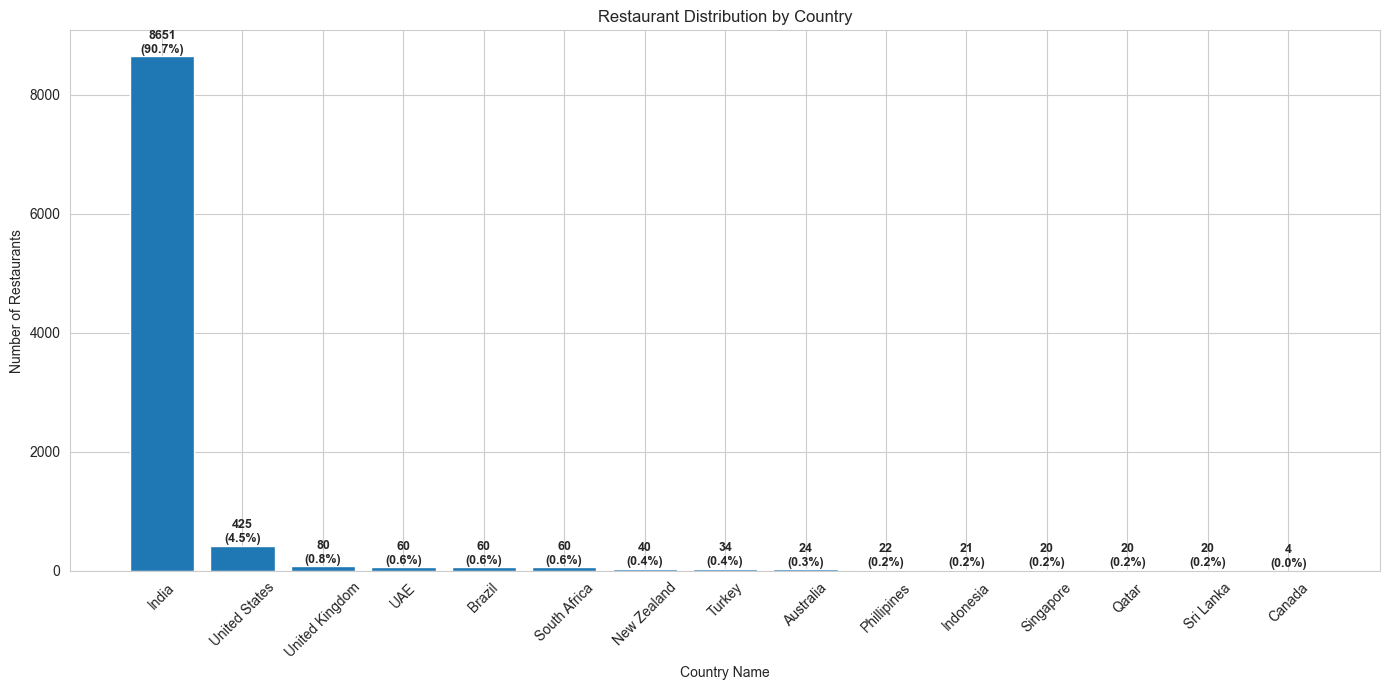

In [65]:
# Country distribution with counts and percentages
plt.figure(figsize=(14, 7))
country_counts = data_clean['Country'].value_counts()
total = len(data_clean)

bars = plt.bar(country_counts.index.astype(str), country_counts.values)

# Add both count and percentage on bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height)}\n({percentage:.1f}%)',  # Count and percentage
             ha='center', va='bottom',
             fontsize=9, fontweight='bold')

plt.title('Restaurant Distribution by Country')
plt.xlabel('Country Name')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

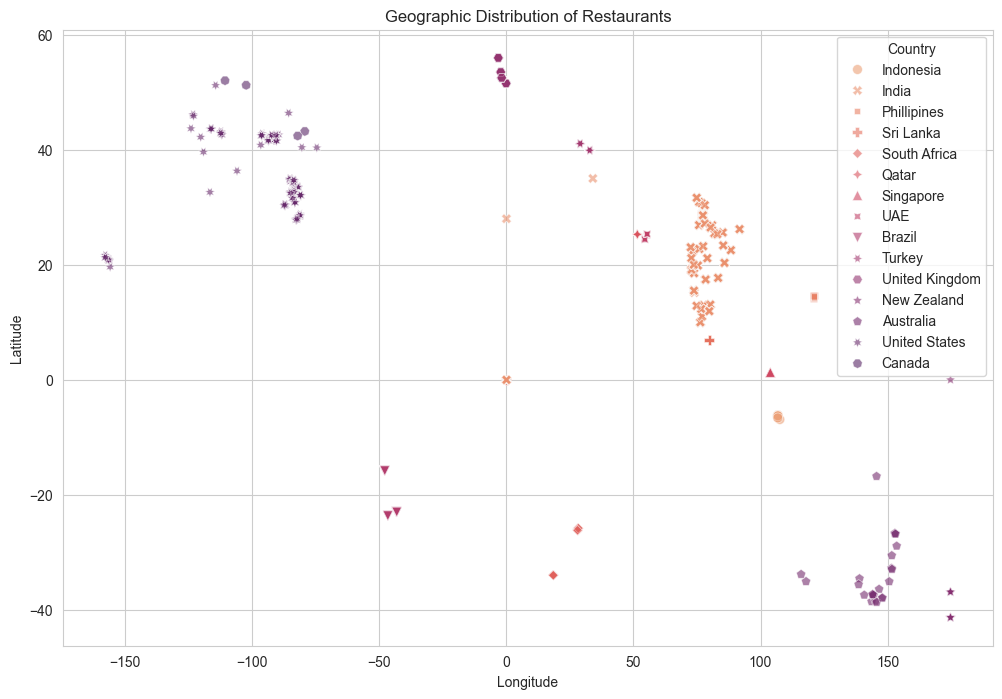

In [66]:
# Geographic distribution
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_clean, x='Longitude', y='Latitude', alpha=0.6, s=50,hue='Country',style='Country',palette='flare')
plt.title('Geographic Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



<Axes: xlabel='Latitude', ylabel='Longitude'>

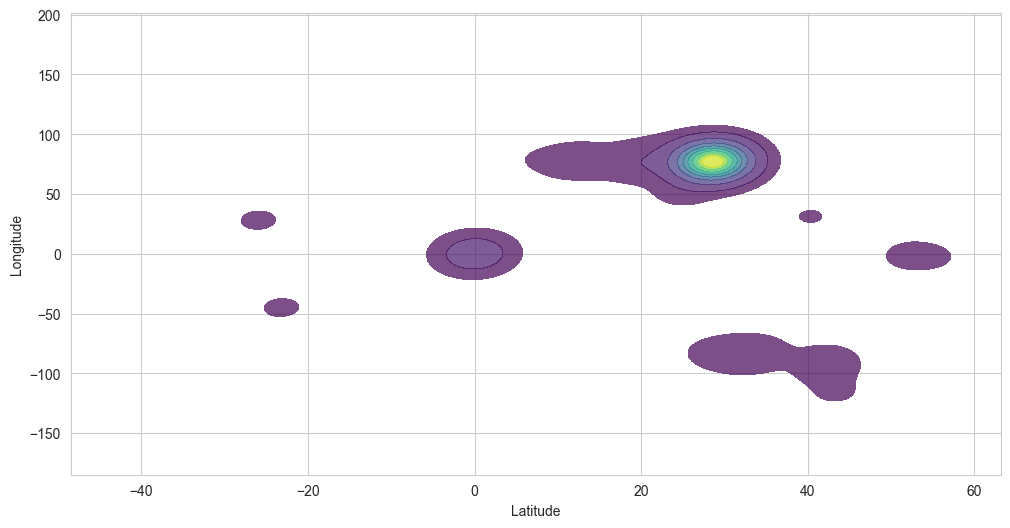

In [67]:
sns.kdeplot(data=data_clean,x='Latitude',y='Longitude',fill=True,alpha=0.7,cmap='viridis')

* 🌍 Geographic Distribution of Restaurants 

The scatter plot of **Latitude vs. Longitude** (colored by country) shows how restaurants are spread globally across 15 countries in the dataset. Dense clusters appear in **India** and the **United States**, while countries like **Brazil**, **South Africa**, and **Australia** show smaller but distinct groupings. This highlights regional concentration of restaurants within certain geographic zones.  

The KDE density plot reinforces these insights by showing high-intensity regions (brighter areas) where restaurant presence is concentrated. The most significant hotspot is observed around **India**, indicating it contributes a large share of restaurants in the dataset, while other regions show lighter, scattered densities.  

⚠️ **Data Quality Note:** From the plots, we can see some points with **Latitude = 0 or Longitude = 0**, which are not realistic locations for restaurants. These are likely missing or incorrectly recorded values and should be cleaned or imputed during preprocessing to avoid skewing spatial analysis.


In [68]:
print('=== GEOGRAPHICAL DISTRIBUTIONS OF RESTAURANTS=== ')

# Get city distribution
city_distribution = data_clean['City'].value_counts()

print(f"Total number of cities: {len(city_distribution)}")
print(f"Total number of restaurants: {len(data_clean)}")

# Cities with maximum number of restaurants
print("\n=== CITIES WITH MAXIMUM RESTAURANTS ===")
top_10_cities = city_distribution.head(10)
for i, (city, count) in enumerate(top_10_cities.items(), 1):
    percentage = (count / len(data_clean)) * 100
    print(f"{i}. {city}: {count} restaurants ({percentage:.1f}%)")

=== GEOGRAPHICAL DISTRIBUTIONS OF RESTAURANTS=== 
Total number of cities: 140
Total number of restaurants: 9541

=== CITIES WITH MAXIMUM RESTAURANTS ===
1. New Delhi: 5473 restaurants (57.4%)
2. Gurgaon: 1118 restaurants (11.7%)
3. Noida: 1080 restaurants (11.3%)
4. Faridabad: 251 restaurants (2.6%)
5. Ghaziabad: 25 restaurants (0.3%)
6. Lucknow: 21 restaurants (0.2%)
7. Guwahati: 21 restaurants (0.2%)
8. Bhubaneshwar: 21 restaurants (0.2%)
9. Amritsar: 21 restaurants (0.2%)
10. Agra: 20 restaurants (0.2%)


In [69]:
#Cities with minimum no. of restaurants
print("===CITIES WITH MINIMUM RESTAURANTS===")
bottom_10_cities = city_distribution.tail(10)
print(bottom_10_cities)

for i,(city,count) in enumerate(bottom_10_cities.items(),1):
    percentage = (count / len(data_clean)) * 100
    print(f"{i}. {city}: {count} restaurants ({percentage:.1f}%)")


===CITIES WITH MINIMUM RESTAURANTS===
City
Trentham East     1
Victor Harbor     1
Clatskanie        1
Fernley           1
Lakeview          1
Mc Millan         1
Vernonia          1
Dicky Beach       1
Inverloch         1
Lakes Entrance    1
Name: count, dtype: int64
1. Trentham East: 1 restaurants (0.0%)
2. Victor Harbor: 1 restaurants (0.0%)
3. Clatskanie: 1 restaurants (0.0%)
4. Fernley: 1 restaurants (0.0%)
5. Lakeview: 1 restaurants (0.0%)
6. Mc Millan: 1 restaurants (0.0%)
7. Vernonia: 1 restaurants (0.0%)
8. Dicky Beach: 1 restaurants (0.0%)
9. Inverloch: 1 restaurants (0.0%)
10. Lakes Entrance: 1 restaurants (0.0%)


In [70]:

# Calculate concentration metrics
print(f"\n=== CONCENTRATION ANALYSIS ===")
top_5_percent = (city_distribution.head(5).sum() / len(data_clean)) * 100
top_10_percent = (city_distribution.head(10).sum() / len(data_clean)) * 100
top_20_percent = (city_distribution.head(20).sum() / len(data_clean)) * 100

print(f"Top 5 cities contain: {top_5_percent:.1f}% of all restaurants")
print(f"Top 10 cities contain: {top_10_percent:.1f}% of all restaurants")
print(f"Top 20 cities contain: {top_20_percent:.1f}% of all restaurants")


=== CONCENTRATION ANALYSIS ===
Top 5 cities contain: 83.3% of all restaurants
Top 10 cities contain: 84.4% of all restaurants
Top 20 cities contain: 86.5% of all restaurants


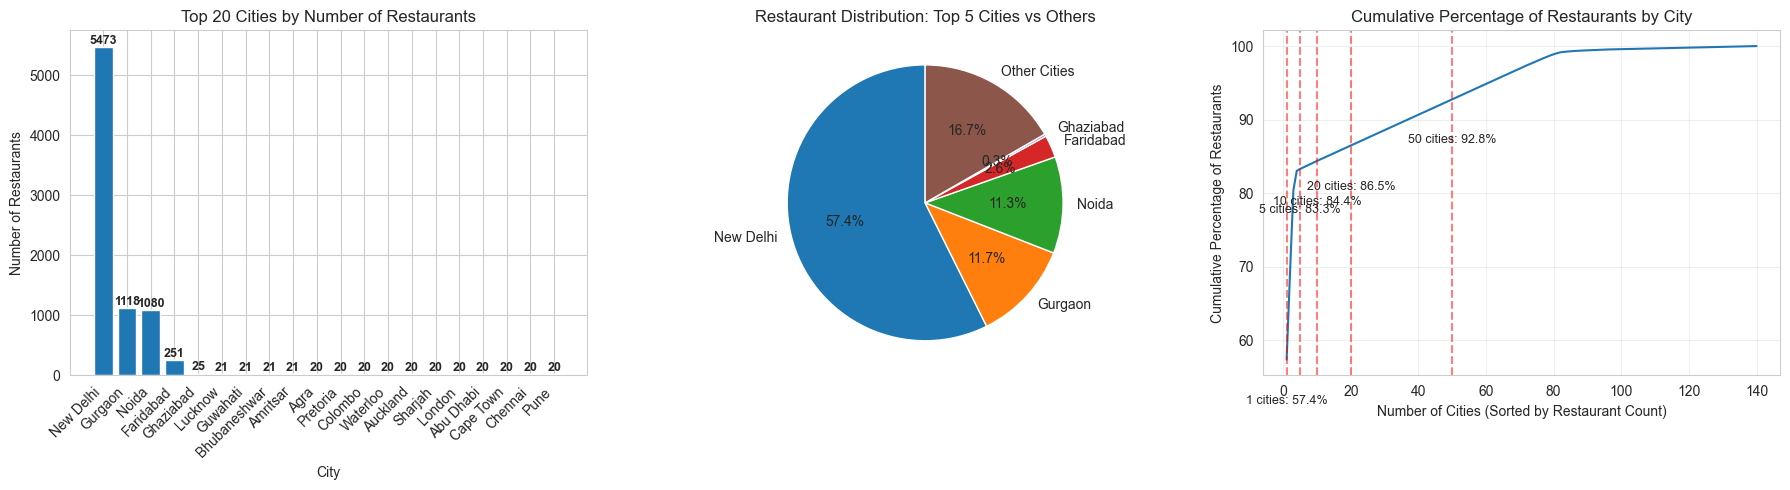

In [71]:
# Visualizations
plt.figure(figsize=(18,5))

# Plot 1: Top 20 cities by restaurant count
plt.subplot(1, 3, 1)
top_20_cities = city_distribution.head(20)
bars = plt.bar(range(len(top_20_cities)), top_20_cities.values)
plt.title('Top 20 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(range(len(top_20_cities)), top_20_cities.index, rotation=45, ha='right')

# Add numbers on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')


# Plot 2: Pie chart showing concentration
plt.subplot(1,3, 2)
top_5 = city_distribution.head(5)
other = city_distribution[5:].sum()
pie_data = pd.concat([top_5, pd.Series({'Other Cities': other})])
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Restaurant Distribution: Top 5 Cities vs Others')

# Plot 3: Cumulative distribution
plt.subplot(1,3,3)
cumulative_percentage = (city_distribution.cumsum() / len(data_clean)) * 100
plt.plot(range(1, len(cumulative_percentage) + 1), cumulative_percentage.values)
plt.title('Cumulative Percentage of Restaurants by City')
plt.xlabel('Number of Cities (Sorted by Restaurant Count)')
plt.ylabel('Cumulative Percentage of Restaurants')
plt.grid(True, alpha=0.3)

# Add annotations for key points
key_points = [1, 5, 10, 20, 50]
for point in key_points:
    if point <= len(cumulative_percentage):
        plt.axvline(x=point, color='red', linestyle='--', alpha=0.5)
        plt.text(point, cumulative_percentage.iloc[point - 1] - 6, 
                f'{point} cities: {cumulative_percentage.iloc[point-1]:.1f}%',
                ha='center', fontsize=9)

plt.tight_layout()




## Coordinate Validation & Imputation

In [72]:
#Check for zero/invalid values in critical columns
print("Rows with zero latitude:",len(data_clean[data_clean['Latitude']==0]))
print("Rows with zero longitude:",len(data_clean[data_clean['Longitude']==0]))
print("Rows with zero Average Cost for two:",len(data_clean[data_clean['Average Cost for two']==0]))


Rows with zero latitude: 498
Rows with zero longitude: 498
Rows with zero Average Cost for two: 15


In [73]:
# ===== SIMPLIFIED COORDINATE IMPUTATION (No Missing Values) =====
print("=== SIMPLIFIED COORDINATE IMPUTATION ===")

# Create valid coordinates mask
valid_coords_mask = (data_clean['Latitude'] != 0) & (data_clean['Longitude'] != 0)

def simple_impute_coordinates(row):
    """
    Simplified imputation that only uses locality-level data
    (Since no missing values, this will handle most cases)
    """
    if (row['Latitude'] == 0) or (row['Longitude'] == 0):
        # 1. FIRST: Try Locality Verbose (most granular)
        locality_verbose_data = data_clean[
            (data_clean['Locality Verbose'] == row['Locality Verbose']) & 
            valid_coords_mask
        ]
        if len(locality_verbose_data) > 0:
            return locality_verbose_data['Latitude'].median(), locality_verbose_data['Longitude'].median()
        
        # 2. SECOND: Try regular Locality
        locality_data = data_clean[
            (data_clean['Locality'] == row['Locality']) & 
            valid_coords_mask
        ]
        if len(locality_data) > 0:
            return locality_data['Latitude'].median(), locality_data['Longitude'].median()
        
        # 3. Try city-level as fallback
        city_data = data_clean[
            (data_clean['City'] == row['City']) & 
            valid_coords_mask
        ]
        if len(city_data) > 0:
            return city_data['Latitude'].median(), city_data['Longitude'].median()
        
        # 4. Ultimate fallback: Country level
        country_data = data_clean[
            (data_clean['Country Code'] == row['Country Code']) & 
            valid_coords_mask
        ]
        if len(country_data) > 0:
            return country_data['Latitude'].median(), country_data['Longitude'].median()
        
        return np.nan, np.nan
    
    # If coordinates are already valid, just return them
    return row['Latitude'], row['Longitude']


print("Applying locality-based imputation...")

# Flag rows that had missing/invalid coordinates
data_clean['Coordinates_Imputed'] = (
    (data_clean['Latitude'] == 0) | 
    (data_clean['Longitude'] == 0)
)

# Apply imputation -> store into NEW columns
data_clean[['Latitude_new', 'Longitude_new']] = data_clean.apply(
    lambda row: pd.Series(simple_impute_coordinates(row)), axis=1
)

# ===== VERIFICATION =====
print("\n=== VERIFICATION ===")
remaining_issues = data_clean[
    (data_clean['Latitude_new'] == 0) | 
    (data_clean['Longitude_new'] == 0)
]
print(f"Remaining coordinate issues: {len(remaining_issues)}")

total_rows = len(data_clean)
imputed_rows = data_clean['Coordinates_Imputed'].sum()
quality_percentage = ((total_rows - imputed_rows) / total_rows) * 100

print(f"\n=== QUALITY METRICS ===")
print(f"Total restaurants: {total_rows}")
print(f"Restaurants with imputed coordinates: {imputed_rows}")
print(f"Data quality score: {quality_percentage:.2f}%")



=== SIMPLIFIED COORDINATE IMPUTATION ===
Applying locality-based imputation...

=== VERIFICATION ===
Remaining coordinate issues: 0

=== QUALITY METRICS ===
Total restaurants: 9541
Restaurants with imputed coordinates: 499
Data quality score: 94.77%


In [ ]:


# All imputed rows
imputed_rows = data_clean[data_clean['Coordinates_Imputed'] == True]

strategy_counter = Counter()

for idx, row in imputed_rows.iterrows():
    current_lat, current_lon = row['Latitude_new'], row['Longitude_new']

    # 1. Locality Verbose
    locality_verbose_median = data_clean[
        (data_clean['Locality Verbose'] == row['Locality Verbose']) & valid_coords_mask
    ][['Latitude', 'Longitude']].median()

    if not locality_verbose_median.empty and \
       abs(current_lat - locality_verbose_median['Latitude']) < 0.001 and \
       abs(current_lon - locality_verbose_median['Longitude']) < 0.001:
        strategy = "Locality Verbose"
    else:
        # 2. Locality
        locality_median = data_clean[
            (data_clean['Locality'] == row['Locality']) & valid_coords_mask
        ][['Latitude', 'Longitude']].median()

        if not locality_median.empty and \
           abs(current_lat - locality_median['Latitude']) < 0.001 and \
           abs(current_lon - locality_median['Longitude']) < 0.001:
            strategy = "Locality"
        else:
            # 3. City
            city_median = data_clean[
                (data_clean['City'] == row['City']) & valid_coords_mask
            ][['Latitude', 'Longitude']].median()

            if not city_median.empty and \
               abs(current_lat - city_median['Latitude']) < 0.001 and \
               abs(current_lon - city_median['Longitude']) < 0.001:
                strategy = "City"
            else:
                # 4. Country
                strategy = "Country"

    strategy_counter[strategy]+=1




In [75]:

# Convert to DataFrame for better display
strategy_df = pd.DataFrame({
    'Strategy': list(strategy_counter.keys()),
    'Count': list(strategy_counter.values()),
    'Percentage': [f"{(count/len(imputed_rows))*100:.1f}%" 
                  for count in strategy_counter.values()]
}).sort_values('Count', ascending=False)

print("✅ Coordinate Imputation Strategy Analysis")
print(f"Total imputed rows: {len(imputed_rows)}\n")
print(tabulate(strategy_df, headers='keys', tablefmt='grid', showindex=False))

✅ Coordinate Imputation Strategy Analysis
Total imputed rows: 499

+------------------+---------+--------------+
| Strategy         |   Count | Percentage   |
+==================+=========+==============+
| Locality Verbose |     456 | 91.4%        |
+------------------+---------+--------------+
| City             |      38 | 7.6%         |
+------------------+---------+--------------+
| Locality         |       5 | 1.0%         |
+------------------+---------+--------------+


##  Franchise National Presence Analysis  

1. **Top Franchises by City Presence**  
   (Which chains operate in the most cities)  
   
2. **Top Franchises by Number of Outlets**  
   (Which chains have the largest footprint overall)  

3. **Relationship Between Geographic Spread and Outlet Count**  
   (Do more cities automatically mean more outlets?)  

4. **Top International Franchises (Across Countries)**  
   (Chains with cross-country presence)

  


In [76]:


print("=== FRANCHISE NATIONAL PRESENCE ANALYSIS ===")

# Calculate national presence metrics
franchise_presence = data_clean.groupby('Restaurant Name').agg({
    'City': 'nunique',          # Number of unique cities
    'Country Code': 'nunique',  # Number of unique countries
    'Restaurant ID': 'count'    # Total number of outlets
}).rename(columns={
    'City': 'Number_of_Cities',
    'Country Code': 'Number_of_Countries', 
    'Restaurant ID': 'Total_Outlets'
}).sort_values('Number_of_Cities', ascending=False)

print(f"Total unique restaurant names: {len(franchise_presence)}")
print(f"Restaurant chains present in multiple cities: {len(franchise_presence[franchise_presence['Number_of_Cities'] > 1])}")

# Top franchises by national presence
print("\n=== TOP 15 FRANCHISES BY NATIONAL PRESENCE (MOST CITIES) ===")
top_15_national = franchise_presence.head(15)
print(top_15_national[['Number_of_Cities', 'Number_of_Countries', 'Total_Outlets']])

# The franchise with the most national presence
top_franchise = franchise_presence.index[0]
top_franchise_data = franchise_presence.loc[top_franchise]

print(f"\n⭐ FRANCHISE WITH MOST NATIONAL PRESENCE: '{top_franchise}' ⭐")
print(f"• Present in {top_franchise_data['Number_of_Cities']} cities")
print(f"• Present in {top_franchise_data['Number_of_Countries']} countries")
print(f"• Total outlets: {top_franchise_data['Total_Outlets']}")





=== FRANCHISE NATIONAL PRESENCE ANALYSIS ===
Total unique restaurant names: 7436
Restaurant chains present in multiple cities: 334

=== TOP 15 FRANCHISES BY NATIONAL PRESENCE (MOST CITIES) ===
                   Number_of_Cities  Number_of_Countries  Total_Outlets
Restaurant Name                                                        
Barbeque Nation                  22                    2             26
Pizza Hut                        12                    2             30
KFC                               8                    1             18
Domino's Pizza                    7                    1             79
McDonald's                        7                    1             48
Mocha                             7                    1              7
Pind Balluchi                     7                    1             20
The Yellow Chilli                 7                    1              7
Farzi Cafe                        6                    2              6
Mainland China 

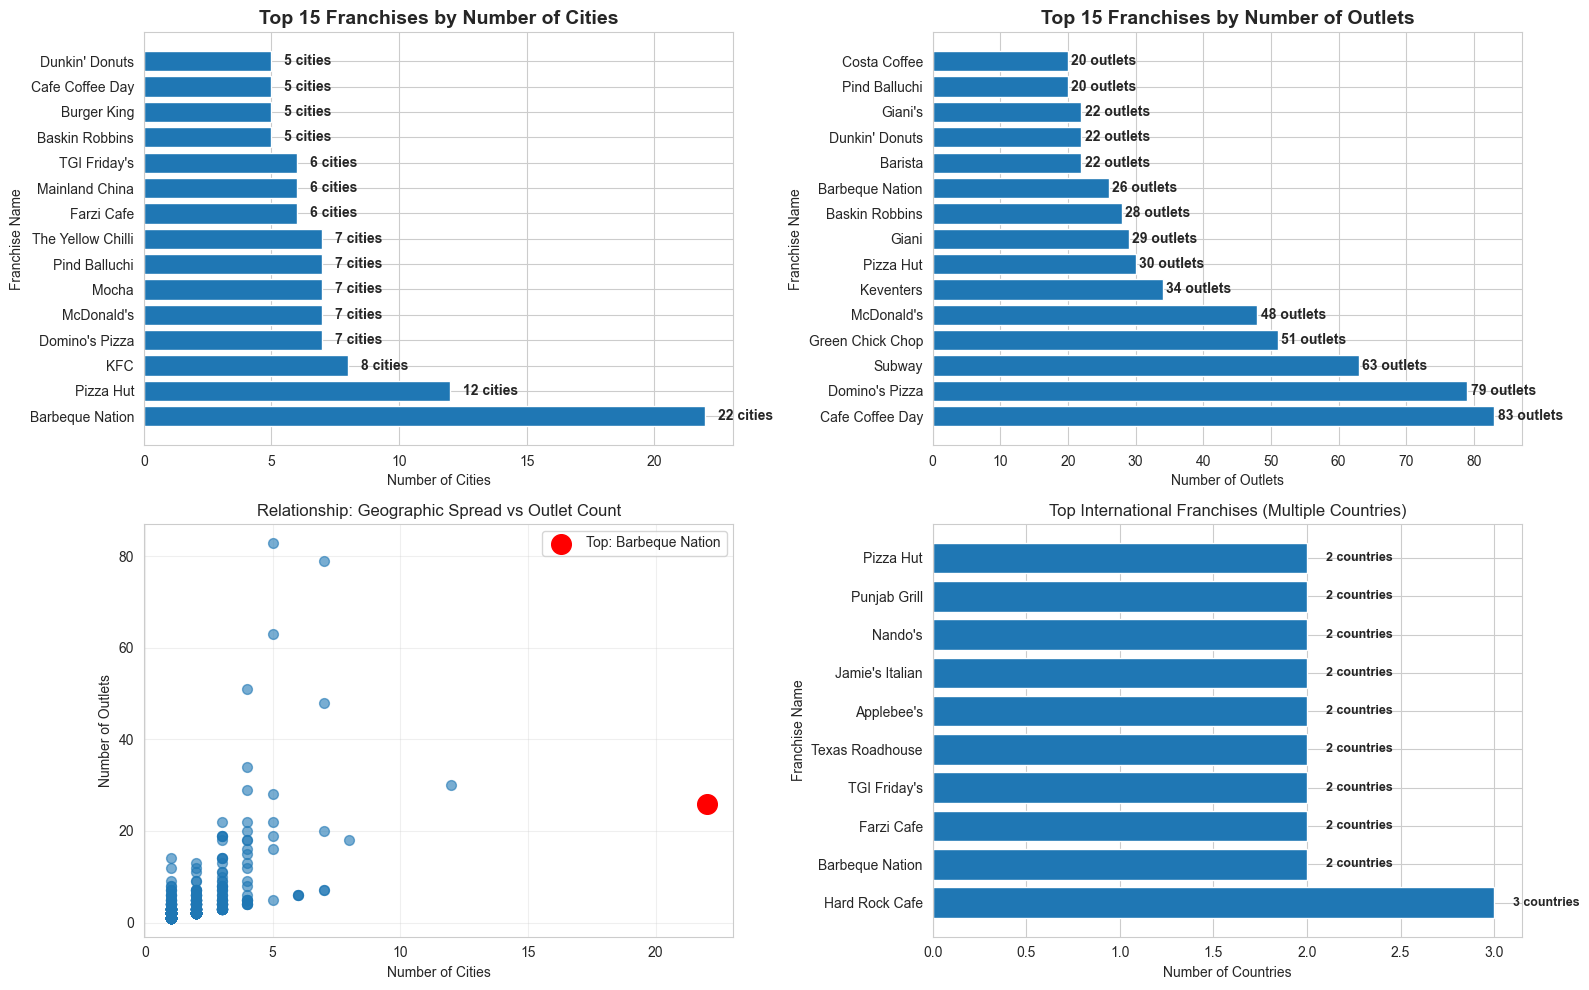

In [77]:
# Visualizations
plt.figure(figsize=(16, 10))

# Plot 1: Top 15 franchises by city presence
plt.subplot(2, 2, 1)
top_15_cities = franchise_presence.head(15)
bars = plt.barh(range(len(top_15_cities)), top_15_cities['Number_of_Cities'])
plt.yticks(range(len(top_15_cities)), top_15_cities.index)
plt.title('Top 15 Franchises by Number of Cities', fontsize=14, fontweight='bold')
plt.xlabel('Number of Cities')
plt.ylabel('Franchise Name')

# Add numbers on bars
for i, (franchise, data) in enumerate(top_15_cities.iterrows()):
    plt.text(data['Number_of_Cities'] + 0.5, i, 
             f"{data['Number_of_Cities']} cities", 
             va='center', fontsize=10, fontweight='bold')

# Plot 2: Top 15 franchises by number of outlets
plt.subplot(2, 2, 2)
top_15_outlets = franchise_presence.sort_values('Total_Outlets', ascending=False).head(15)
bars = plt.barh(range(len(top_15_outlets)), top_15_outlets['Total_Outlets'])
plt.yticks(range(len(top_15_outlets)), top_15_outlets.index)
plt.title('Top 15 Franchises by Number of Outlets', fontsize=14, fontweight='bold')
plt.xlabel('Number of Outlets')
plt.ylabel('Franchise Name')

# Add numbers on bars
for i, (franchise, data) in enumerate(top_15_outlets.iterrows()):
    plt.text(data['Total_Outlets'] + 0.5, i, 
             f"{data['Total_Outlets']} outlets", 
             va='center', fontsize=10, fontweight='bold')

# Plot 3: Relationship between cities and outlets
plt.subplot(2, 2, 3)
plt.scatter(franchise_presence['Number_of_Cities'], franchise_presence['Total_Outlets'], alpha=0.6, s=50)
plt.xlabel('Number of Cities')
plt.ylabel('Number of Outlets')
plt.title('Relationship: Geographic Spread vs Outlet Count', fontsize=12)
plt.grid(True, alpha=0.3)

# Highlight the top franchise
plt.scatter(top_franchise_data['Number_of_Cities'], top_franchise_data['Total_Outlets'], 
            color='red', s=200, label=f"Top: {top_franchise}")
plt.legend()

# Plot 4: International franchises (present in multiple countries)
plt.subplot(2, 2, 4)
international_franchises = franchise_presence[franchise_presence['Number_of_Countries'] > 1]
international_franchises = international_franchises.sort_values('Number_of_Countries', ascending=False).head(10)

if len(international_franchises) > 0:
    bars = plt.barh(range(len(international_franchises)), international_franchises['Number_of_Countries'])
    plt.yticks(range(len(international_franchises)), international_franchises.index)
    plt.title('Top International Franchises (Multiple Countries)', fontsize=12)
    plt.xlabel('Number of Countries')
    plt.ylabel('Franchise Name')
    
    for i, (franchise, data) in enumerate(international_franchises.iterrows()):
        plt.text(data['Number_of_Countries'] + 0.1, i, 
                 f"{data['Number_of_Countries']} countries", 
                 va='center', fontsize=9, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'No international franchises found', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()
plt.show()



## Table Booking Availability Analysis  

1. **Frequency Distribution**  
   (Number of restaurants that allow vs. do not allow bookings)  

2. **Percentage Distribution**  
   (Share of restaurants offering table booking)  

3. **Ratio Analysis**  
   (Yes-to-No ratio, expressed in both decimal and simplified whole numbers)  


In [78]:
# Create the cross-tabulations
booking_table = pd.crosstab(index=data_clean['Has Table booking'], columns='Count')
booking_table_pct = pd.crosstab(index=data_clean['Has Table booking'], columns='Percentage', normalize=True) * 100

# Clean up the table index and column names for a prettier print
booking_table = booking_table.rename_axis('Booking Option', axis='index')
booking_table_pct = booking_table_pct.rename_axis('Booking Option', axis='index')

print("FREQUENCY DISTRIBUTION")
print("======================")
print(booking_table)
print("\nPERCENTAGE DISTRIBUTION")
print("=======================")
print(booking_table_pct.round(2))
print("-" * 40)

# Extract counts from the crosstab for the ratio
yes_count = booking_table.loc['Yes', 'Count']
no_count = booking_table.loc['No', 'Count']

# Calculate both forms of the ratio
ratio_yes_to_no = yes_count / no_count
ratio_no_to_yes = no_count / yes_count

print(f"\nANALYSIS:")
print(f"Restaurants allowing booking: {yes_count} ({booking_table_pct.loc['Yes', 'Percentage']:.2f}%)")
print(f"Restaurants not allowing booking: {no_count} ({booking_table_pct.loc['No', 'Percentage']:.2f}%)")
print(f"\nRatio (Yes : No) is approximately 1 : {ratio_no_to_yes:.2f}")
# Or to express it in a simplified whole-number ratio:
from math import gcd
divisor = gcd(yes_count, no_count)
print(f"Simplified Whole-Number Ratio: {yes_count//divisor}:{no_count//divisor}")

FREQUENCY DISTRIBUTION
col_0           Count
Booking Option       
No               8383
Yes              1158

PERCENTAGE DISTRIBUTION
col_0           Percentage
Booking Option            
No                   87.86
Yes                  12.14
----------------------------------------

ANALYSIS:
Restaurants allowing booking: 1158 (12.14%)
Restaurants not allowing booking: 8383 (87.86%)

Ratio (Yes : No) is approximately 1 : 7.24
Simplified Whole-Number Ratio: 1158:8383


###  Online Delivery Availability Analysis  

1. **Frequency Distribution**  
   (Counts of restaurants that provide vs. do not provide online delivery)  

2. **Percentage Distribution**  
   (Proportion of restaurants offering online delivery)  

3. **Detailed Analysis**  
   - Restaurants with online delivery (count & percentage)  
   - Restaurants without online delivery (count & percentage)  
   - Total restaurants analyzed  


In [79]:
# Calculate the percentage of restaurants providing online delivery
online_delivery_table = pd.crosstab(index=data_clean['Has Online delivery'], 
                                   columns='Count', 
                                   margins=True, 
                                   margins_name='Total')

online_delivery_pct = pd.crosstab(index=data_clean['Has Online delivery'], 
                                 columns='Percentage', 
                                 normalize=True) * 100

print("ONLINE DELIVERY AVAILABILITY")
print("=" * 10)
print("Frequency Distribution:")
print(online_delivery_table)
print("\nPercentage Distribution:")
print(online_delivery_pct.round(2))

# Extract values for detailed analysis
yes_count = online_delivery_table.loc['Yes', 'Count']
no_count = online_delivery_table.loc['No', 'Count']
total_count = online_delivery_table.loc['Total', 'Count']

yes_percentage = online_delivery_pct.loc['Yes', 'Percentage']
no_percentage = online_delivery_pct.loc['No', 'Percentage']

print("\n" + "-" * 50)
print("DETAILED ANALYSIS:")
print(f"Restaurants providing online delivery: {yes_count} ({yes_percentage:.2f}%)")
print(f"Restaurants not providing online delivery: {no_count} ({no_percentage:.2f}%)")
print(f"Total restaurants analyzed: {total_count}")

ONLINE DELIVERY AVAILABILITY
Frequency Distribution:
col_0                Count  Total
Has Online delivery              
No                    7090   7090
Yes                   2451   2451
Total                 9541   9541

Percentage Distribution:
col_0                Percentage
Has Online delivery            
No                        74.31
Yes                       25.69

--------------------------------------------------
DETAILED ANALYSIS:
Restaurants providing online delivery: 2451 (25.69%)
Restaurants not providing online delivery: 7090 (74.31%)
Total restaurants analyzed: 9541


## Votes Analysis by Online Delivery Status (Statistical Testing)  

1. **Descriptive Analysis**  
   - Mean, count, and total votes for each group (With vs. Without Delivery)  

2. **Assumption Checks**  
   - Normality (Q-Q Plots + Shapiro-Wilk Test)  
   - Homogeneity of variance (Levene’s Test)  

3. **Hypothesis Testing**  
   - Welch’s t-test for difference in mean votes  
   - 95% Confidence Interval of the difference  

4. **Effect Size**  
   - Cohen’s d to measure practical significance  

5. **Conclusion**  
   - Statistical decision (reject/fail to reject null hypothesis)  
   - Business insight on whether online delivery impacts customer voting behavior  


In [80]:
# Step 1: Group the data by online delivery status and calculate the mean votes for each group
vote_analysis = data_clean.groupby('Has Online delivery')['Votes'].agg(['mean', 'count','sum']).round(2)

# Step 2: Rename the columns for clarity
vote_analysis = vote_analysis.rename(columns={'mean': 'Average_Votes', 'count': 'Restaurant_Count','sum':'Total_no_of_votes'})

print("AVERAGE VOTES ANALYSIS BY ONLINE DELIVERY STATUS")
print("================================================")
print(vote_analysis)

# Step 3: Extract the average values
avg_votes_delivery_yes = vote_analysis.loc['Yes', 'Average_Votes']
avg_votes_delivery_no = vote_analysis.loc['No', 'Average_Votes']

# Step 4: Calculate the difference
difference_in_avg_votes = avg_votes_delivery_yes - avg_votes_delivery_no

print("\n" + "-" * 50)
print("KEY FINDING:")
print(f"Average votes for restaurants WITH online delivery: {avg_votes_delivery_yes}")
print(f"Average votes for restaurants WITHOUT online delivery: {avg_votes_delivery_no}")
print(f"Difference in average votes (Yes - No): {difference_in_avg_votes:.2f}")

AVERAGE VOTES ANALYSIS BY ONLINE DELIVERY STATUS
                     Average_Votes  Restaurant_Count  Total_no_of_votes
Has Online delivery                                                    
No                          137.83              7090             977236
Yes                         211.31              2451             517914

--------------------------------------------------
KEY FINDING:
Average votes for restaurants WITH online delivery: 211.31
Average votes for restaurants WITHOUT online delivery: 137.83
Difference in average votes (Yes - No): 73.48


Sample Sizes: Yes=2451, No=7090


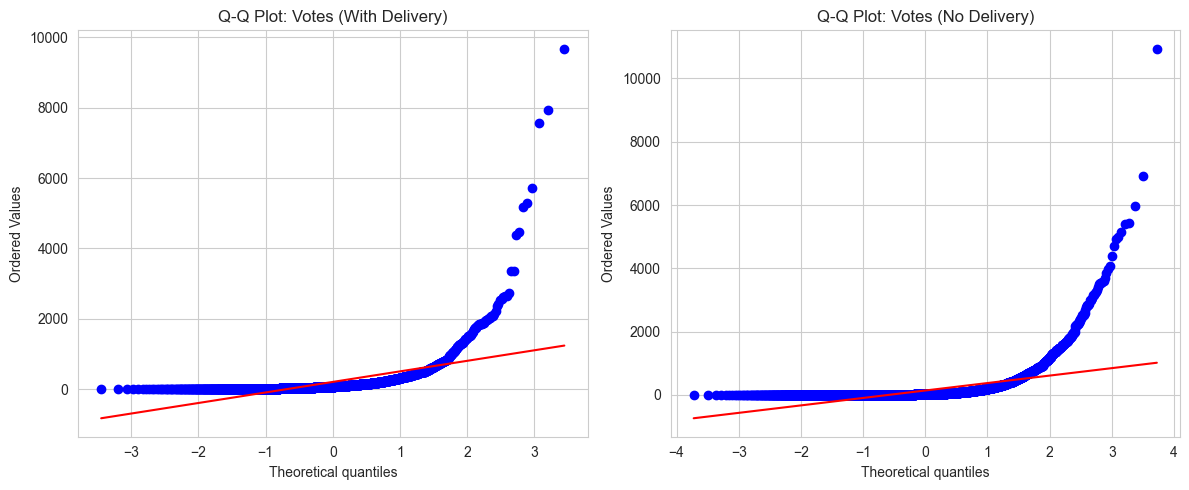


Shapiro-Wilk Test for Normality:
  With Delivery: Statistic=0.3660, p-value=1.9256e-68
  No Delivery:   Statistic=0.3416, p-value=3.2313e-95

Levene's Test for Equal Variances:
  Statistic=21.3418, p-value=3.8930e-06


d:\Sushmitha\projects_\web_scrapper\marketing_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7090.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:


# Split the data into two groups
votes_delivery_yes = data_clean[data_clean['Has Online delivery'] == 'Yes']['Votes']
votes_delivery_no = data_clean[data_clean['Has Online delivery'] == 'No']['Votes']

print(f"Sample Sizes: Yes={len(votes_delivery_yes)}, No={len(votes_delivery_no)}")

# 1. Check Normality visually (Q-Q Plots are best)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q Plot for Group "Yes"
stats.probplot(votes_delivery_yes, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot: Votes (With Delivery)')

# Q-Q Plot for Group "No"
stats.probplot(votes_delivery_no, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot: Votes (No Delivery)')
plt.tight_layout()
plt.show()

# 2. Check Normality statistically (Shapiro-Wilk Test)
# Note: With large sample sizes (>5000), this test is overly sensitive and will almost always reject the null hypothesis (H0: data is normal).
# The visual Q-Q plot is more important here.
shapiro_yes = stats.shapiro(votes_delivery_yes)
shapiro_no = stats.shapiro(votes_delivery_no)
print(f"\nShapiro-Wilk Test for Normality:")
print(f"  With Delivery: Statistic={shapiro_yes.statistic:.4f}, p-value={shapiro_yes.pvalue:.4e}")
print(f"  No Delivery:   Statistic={shapiro_no.statistic:.4f}, p-value={shapiro_no.pvalue:.4e}")

# 3. Check Homogeneity of Variances (Levene's Test)
levene_test = stats.levene(votes_delivery_yes, votes_delivery_no)
print(f"\nLevene's Test for Equal Variances:")
print(f"  Statistic={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4e}")

*"Due to the large sample sizes (N = 2,451 and N = 7,090), formal normality tests like Shapiro-Wilk are overly sensitive and not informative. Visual inspection via Q-Q plots confirmed the expected right-skewed distribution of vote counts. However, the Central Limit Theorem ensures the validity of the t-test approach. Levene's test indicated unequal variances (p < 0.001), so Welch's t-test was employed."*


In [82]:
# Perform Welch's t-test (appropriate for unequal variances)
t_stat, p_value = stats.ttest_ind(votes_delivery_yes, votes_delivery_no, equal_var=False)

print("="*60)
print("FINAL STATISTICAL ANALYSIS RESULTS")
print("="*60)
print(f"Sample Sizes: With Delivery = {len(votes_delivery_yes)}, Without Delivery = {len(votes_delivery_no)}")
print(f"Mean Votes - With Delivery:    {votes_delivery_yes.mean():.2f}")
print(f"Mean Votes - Without Delivery: {votes_delivery_no.mean():.2f}")
print(f"Difference in Means:           {votes_delivery_yes.mean() - votes_delivery_no.mean():.2f}")
print(f"Variance Ratio:                {votes_delivery_yes.var() / votes_delivery_no.var():.2f}")

print(f"\nWelch's T-Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Degrees of Freedom: {stats.ttest_ind(votes_delivery_yes, votes_delivery_no, equal_var=False).df:.1f}")

# Calculate 95% Confidence Interval for the difference
import scipy.stats as stats
mean_diff = votes_delivery_yes.mean() - votes_delivery_no.mean()
se = np.sqrt(votes_delivery_yes.var()/len(votes_delivery_yes) + votes_delivery_no.var()/len(votes_delivery_no))
df = stats.ttest_ind(votes_delivery_yes, votes_delivery_no, equal_var=False).df
ci_low, ci_high = stats.t.interval(0.95, df, loc=mean_diff, scale=se)

print(f"\n95% Confidence Interval for Difference: ({ci_low:.2f}, {ci_high:.2f})")

# Calculate Effect Size (Cohen's d)
def cohen_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    d = (np.mean(group1) - np.mean(group2)) / pooled_std
    return d

effect_size = cohen_d(votes_delivery_yes, votes_delivery_no)
print(f"\nEffect Size (Cohen's d): {effect_size:.3f}")

# Interpret the results
alpha = 0.05
print(f"\nSignificance Level (alpha): {alpha}")
if p_value < alpha:
    print("✓ DECISION: Reject the null hypothesis")
    print("✓ CONCLUSION: Strong statistical evidence that restaurants with online delivery")
    print("  receive significantly more votes on average")
else:
    print("× DECISION: Fail to reject the null hypothesis")
    print("× CONCLUSION: No statistical evidence of difference in votes")

# Interpret effect size
print(f"\nEFFECT SIZE INTERPRETATION:")
if abs(effect_size) < 0.2:
    size_desc = "Very Small"
elif abs(effect_size) < 0.5:
    size_desc = "Small"
elif abs(effect_size) < 0.8:
    size_desc = "Medium"
else:
    size_desc = "Large"

print(f"Cohen's d = {effect_size:.3f} ({size_desc} effect)")

FINAL STATISTICAL ANALYSIS RESULTS
Sample Sizes: With Delivery = 2451, Without Delivery = 7090
Mean Votes - With Delivery:    211.31
Mean Votes - Without Delivery: 137.83
Difference in Means:           73.47
Variance Ratio:                1.51

Welch's T-Test Results:
T-statistic: 6.6197
P-value: 4.1287e-11
Degrees of Freedom: 3634.5

95% Confidence Interval for Difference: (51.71, 95.24)

Effect Size (Cohen's d): 0.171

Significance Level (alpha): 0.05
✓ DECISION: Reject the null hypothesis
✓ CONCLUSION: Strong statistical evidence that restaurants with online delivery
  receive significantly more votes on average

EFFECT SIZE INTERPRETATION:
Cohen's d = 0.171 (Very Small effect)


## 📊 Interpretation & Business Implications

### 🎯 Statistical Significance
- **Result:** `p-value = 4.1287e-11` (≪ 0.05)
- **Interpretation:** The difference in average votes is **highly statistically significant**. There is less than a 1 in 10 billion chance that this observed difference (73.47 votes) is due to random chance.
- **Decision:** Confidently reject the null hypothesis.

### 📈 Practical Significance (Effect Size)
- **Result:** `Cohen's d = 0.171`
- **Interpretation:** This represents a **"Very Small" effect size** according to conventional guidelines (0.2 = Small, 0.5 = Medium, 0.8 = Large).
- **Implication:** While the difference is real and measurable, the magnitude of the impact is modest. Online delivery is a contributing factor, but not a primary driver of customer votes.

### 🎯 Precision of the Estimate
- **95% Confidence Interval:** `(51.71, 95.24)`
- **Interpretation:** We can be 95% confident that the true average difference in votes for the population of all restaurants lies between approximately **52 and 95 votes**.

---

## ✅ Recommended Business Actions

| Action | Priority | Rationale |
| :--- | :--- | :--- |
| **Include in "Star" Algorithm** | Medium | Include as a feature with **low-to-moderate weighting** (~10-15%). It is a real signal, but not a strong one. |
| **Use as a UX Filter** | High | Excellent candidate for a filter option in the B2C portal ("Show Delivery Options"). |
| **Advise Restaurant Partners** | Medium | Can recommend adding online delivery, but must **manage expectations**. It is one of many success factors. |
| **Further Investigation** | Low | Research interaction effects (e.g., does delivery matter more for specific cuisines or price ranges?). |

## ⚠️ Important Caveats
- **Correlation ≠ Causation:** This analysis shows an association, not proof that adding delivery *causes* more votes. It could be that more popular restaurants are more likely to offer delivery.
- **Small Effect Size:** The modest Cohen's *d* value (0.171) means other factors (e.g., food quality, rating, service) are almost certainly more important for identifying "star" restaurants.

##  Cuisine Diversity and Popularity Analysis  

 




### Global Cuisine Popularity
   - Frequency counts of cuisines  
   - Word cloud visualization of the most common cuisines 

In [83]:
all_cuisines_served = data_clean['Cuisines'].str.split(",").explode()
all_cuisines_served = all_cuisines_served.str.strip() 
cuisine_freq = Counter(all_cuisines_served)
top_cuisines = all_cuisines_served.value_counts()
print(top_cuisines.head(10))


Cuisines
North Indian    3959
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          763
Bakery           745
Continental      735
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


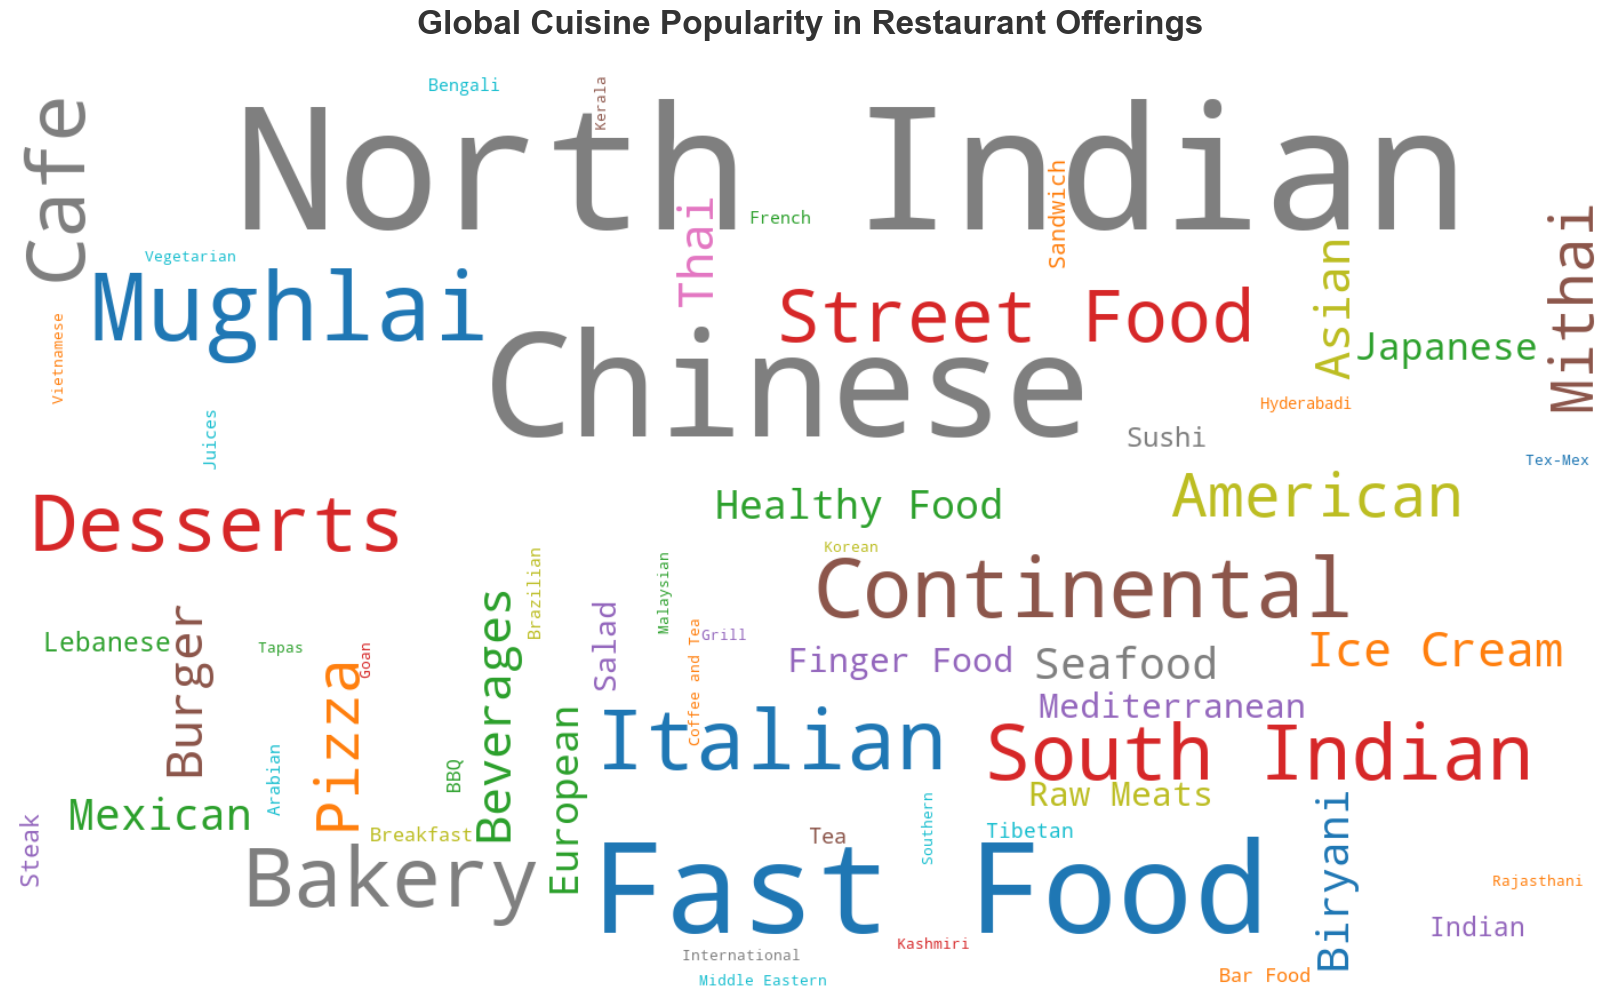

In [ ]:


# Define a color function for a consistent color scheme
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Using a shades of blue color scheme
    return f'hsl(210, 80%, {random.randint(40, 60)}%)'

# Create a more stylized word cloud
wordcloud_advanced = WordCloud(
    width=1400,
    height=800,
    background_color='white',
    prefer_horizontal=0.7, # Mix of horizontal and vertical text
    max_words=60,
    relative_scaling=0.5, # Adjust the importance of frequency vs. rank
    colormap='tab10',     # Use a qualitative colormap
    normalize_plurals=False,
    min_font_size=10,
    max_font_size=150,
    random_state=42       # For reproducible results
).generate_from_frequencies(cuisine_freq)

# Apply the color function
# wordcloud_advanced.recolor(color_func=grey_color_func) # Uncomment for a single-color scheme

# Plot
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud_advanced, interpolation='bilinear')
plt.axis('off')
plt.title('Global Cuisine Popularity in Restaurant Offerings', fontsize=24, pad=30, fontweight='bold', color='#333333')
plt.tight_layout(pad=0)
plt.show()

### Cuisine Variety per Restaurant
   - Maximum and minimum number of cuisines served by a restaurant  


In [85]:
# Calculate the number of cuisines for each restaurant
data_clean['Number_of_Cuisines'] = data_clean['Cuisines'].str.split(', ').str.len()

# Find max and min
max_cuisines = data_clean['Number_of_Cuisines'].max()
min_cuisines = data_clean['Number_of_Cuisines'].min()

print("NUMBER OF CUISINES ANALYSIS")
print("="*40)
print(f"Maximum number of cuisines served by a single restaurant: {max_cuisines}")
print(f"Minimum number of cuisines served by a single restaurant: {min_cuisines}")



NUMBER OF CUISINES ANALYSIS
Maximum number of cuisines served by a single restaurant: 8
Minimum number of cuisines served by a single restaurant: 1


### Most Common Cuisine by City
   - City-level analysis showing the dominant cuisine and its percentage share  



In [86]:
# Create a function that returns a Series with proper structure
def get_cuisine_stats(cuisine_series):
    all_cuisines = cuisine_series.str.split(', ').explode()
    all_cuisines = all_cuisines.str.strip()
    
    if all_cuisines.empty:
        return pd.Series({'Most_Common_Cuisine': None, 'Percentage': None})
    
    cuisine_counts = all_cuisines.value_counts()
    most_common_cuisine = cuisine_counts.index[0]
    count = cuisine_counts.iloc[0]
    percentage = (count / len(cuisine_series)) * 100
    
    return pd.Series({
        'Most_Common_Cuisine': most_common_cuisine,
        'Percentage': round(percentage, 2)
    })

# Apply the function correctly
city_stats = data_clean.groupby('City').agg({
    'Cuisines': ['count', get_cuisine_stats]
}).reset_index()

# Flatten the multi-level columns
city_stats.columns = ['City', 'Total_Restaurants', 'Cuisine_Stats']

# Extract the cuisine stats and rename the columns properly
cuisine_stats_df = city_stats['Cuisine_Stats'].apply(pd.Series)
cuisine_stats_df.columns = ['Most_Common_Cuisine', 'Percentage']  # This is the key fix!

# Combine everything
city_cuisine_analysis = pd.concat([
    city_stats[['City', 'Total_Restaurants']],
    cuisine_stats_df
], axis=1)

# Display clean results
print("\nMOST COMMON CUISINE BY CITY")
print("="*60)
print(city_cuisine_analysis.to_string(index=False))


MOST COMMON CUISINE BY CITY
                  City  Total_Restaurants Most_Common_Cuisine  Percentage
             Abu Dhabi                 20              Indian       35.00
                  Agra                 20        North Indian       75.00
             Ahmedabad                 20         Continental       55.00
                Albany                 17               Steak       23.53
             Allahabad                 20        North Indian       60.00
              Amritsar                 21        North Indian       71.43
                Ankara                 20               Kebab       50.00
              Armidale                  1            Bar Food      100.00
                Athens                 20            American       25.00
              Auckland                 20                Cafe       25.00
               Augusta                 20            American       15.00
            Aurangabad                 20        North Indian       75.00
         

### Cuisine Dominance in Top Cities 
   - Visualization of how strongly the most common cuisine dominates in the top 15 cities  

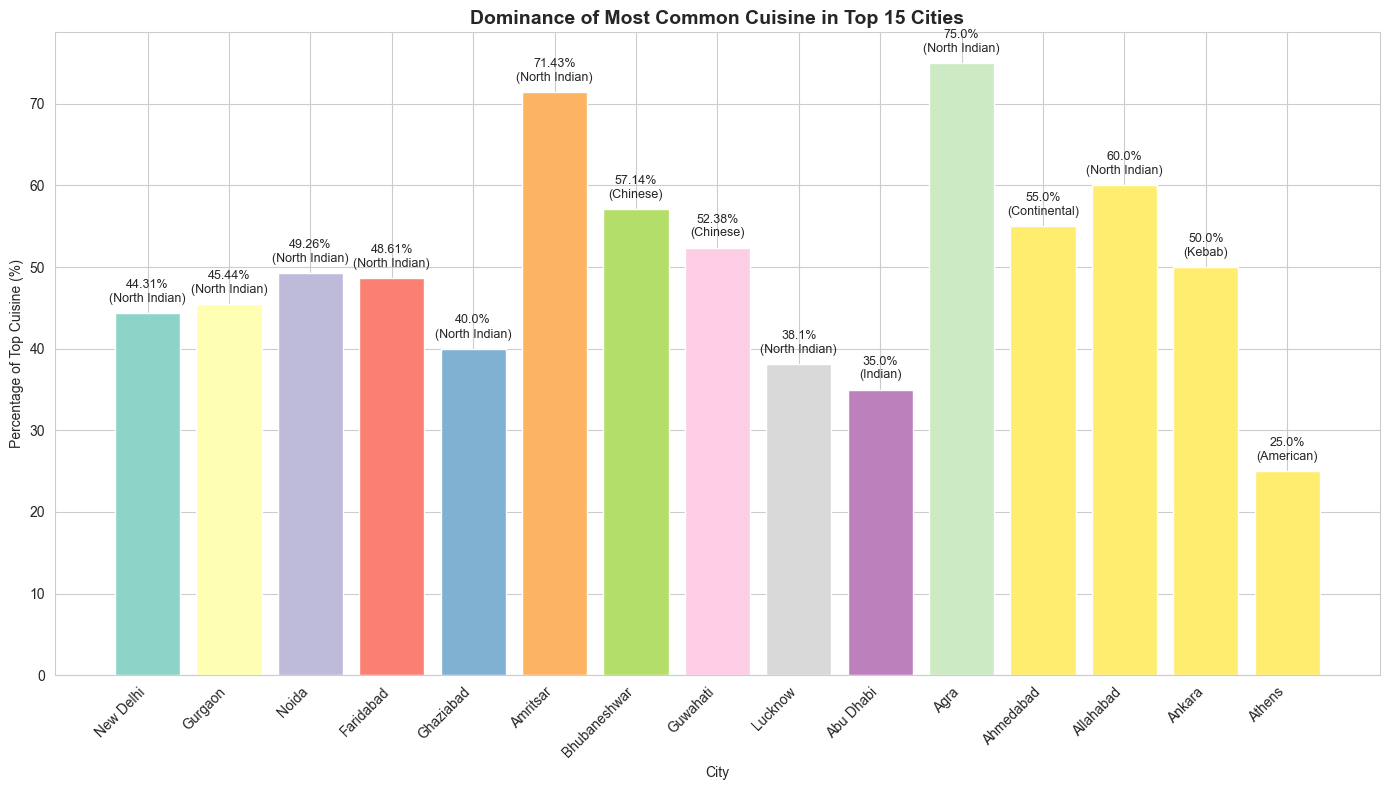

In [87]:
# Get top 15 cities
top_15_cities = city_cuisine_analysis.nlargest(15, 'Total_Restaurants')

plt.figure(figsize=(14, 8))
bars = plt.bar(top_15_cities['City'], top_15_cities['Percentage'], 
               color=plt.cm.Set3(range(len(top_15_cities))))

plt.xlabel('City')
plt.ylabel('Percentage of Top Cuisine (%)')
plt.title('Dominance of Most Common Cuisine in Top 15 Cities', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, percentage, cuisine in zip(bars, top_15_cities['Percentage'], top_15_cities['Most_Common_Cuisine']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{percentage}%\n({cuisine})', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

##  Cost Distribution and Price Segmentation Analysis


### Currency Overview 
   - Frequency of different currencies in the dataset  
   - Range (min, max, mean) of costs by major currencies

In [88]:
# First, let's see what currencies we have
print("CURRENCES IN THE DATASET:")
print("="*30)
print(data_clean['Currency'].value_counts())

# Let's see the range of values for each major currency
major_currencies = data_clean['Currency'].value_counts().head(5).index
print(f"\nRANGE OF VALUES BY CURRENCY:")
print("="*40)

for currency in major_currencies:
    currency_data = data_clean[data_clean['Currency'] == currency]['Average Cost for two']
    print(f"{currency}: Min={currency_data.min():,} - Max={currency_data.max():,} - Mean={currency_data.mean():,.0f}")

CURRENCES IN THE DATASET:
Currency
Indian Rupees(Rs.)        8651
Dollar($)                  473
Pounds(å£)                  80
Emirati Diram(AED)          60
Brazilian Real(R$)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Sri Lankan Rupee(LKR)       20
Qatari Rial(QR)             20
Name: count, dtype: int64

RANGE OF VALUES BY CURRENCY:
Indian Rupees(Rs.): Min=0 - Max=8,000 - Mean=623
Dollar($): Min=0 - Max=500 - Mean=32
Pounds(å£): Min=10 - Max=230 - Mean=48
Emirati Diram(AED): Min=40 - Max=500 - Mean=166
Brazilian Real(R$): Min=30 - Max=400 - Mean=135



### Standardization to USD
   - Conversion of all restaurant costs into USD for consistency  
   - Visualizations: histogram + boxplot of cost distribution in USD 

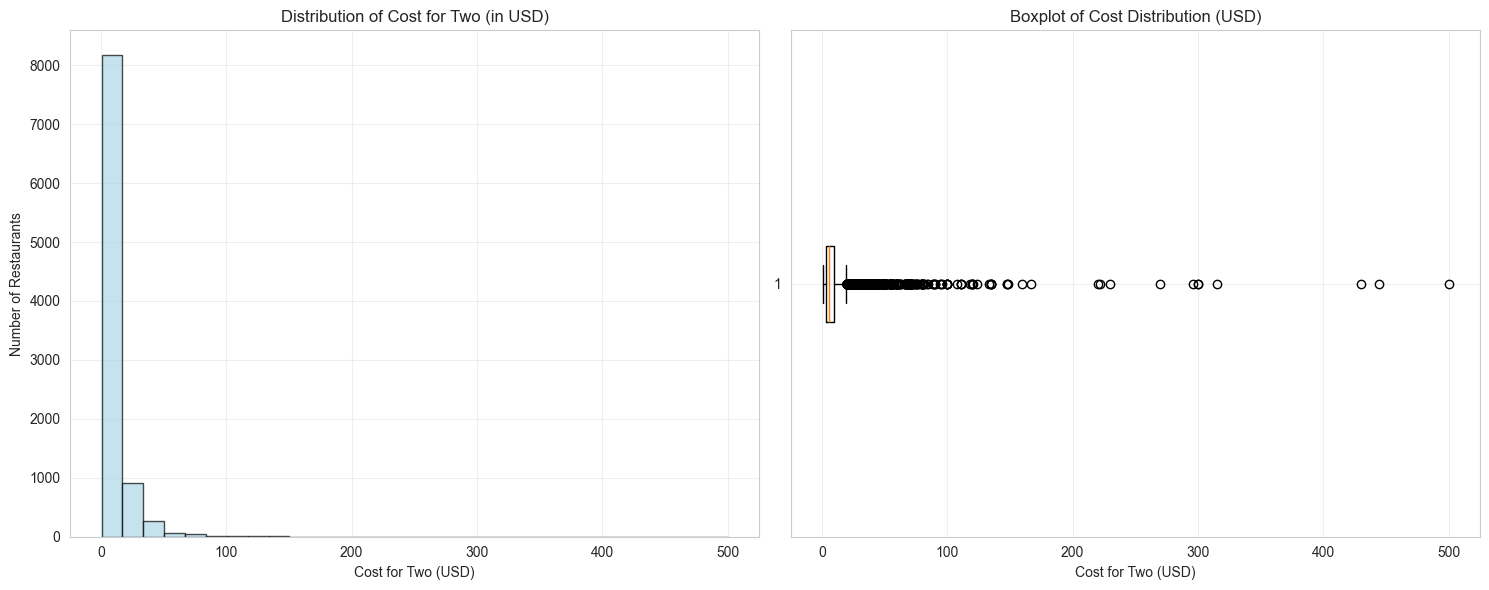

In [89]:
# Create conversion rates dictionary (approximate rates)
conversion_rates = {
    'Indian Rupees(Rs.)': 0.012,  # 1 INR ≈ 0.012 USD
    'Dollar($)': 1.0,
    'Pounds(£)': 1.22,  # 1 GBP ≈ 1.22 USD
    'Emirati Diram(AED)': 0.27,
    'Brazilian Real(R$)': 0.19,
    'Rand(R)': 0.052,
    'NewZealand($)': 0.62,
    'Turkish Lira(TL)': 0.052,
    'Botswana Pula(P)': 0.074,
    'Indonesian Rupiah(IDR)': 0.000064,
    'Sri Lankan Rupee(LKR)': 0.0031,
    'Qatari Rial(QR)': 0.27
}

# Convert all costs to USD
data_clean['Cost_in_USD'] = data_clean.apply(lambda row: row['Average Cost for two'] * conversion_rates.get(row['Currency'], 1), axis=1)

# Filter out zero and extreme values for reasonable analysis
cost_data_usd = data_clean[(data_clean['Cost_in_USD'] > 0) ]['Cost_in_USD']

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Histogram
axes[0].hist(cost_data_usd, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0].set_title('Distribution of Cost for Two (in USD)')
axes[0].set_xlabel('Cost for Two (USD)')
axes[0].set_ylabel('Number of Restaurants')
axes[0].grid(True, alpha=0.3)

# Plot 2: Boxplot
axes[1].boxplot(cost_data_usd, vert=False)
axes[1].set_title('Boxplot of Cost Distribution (USD)')
axes[1].set_xlabel('Cost for Two (USD)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



### Data Cleaning & Imputation
   - Detect and impute zero-cost entries using price range and median costs  
   - Verification of conversions back to original currencies  


In [90]:
# Step 1: Convert all original costs to USD first
data_clean['Cost_in_USD'] = data_clean.apply(lambda row: row['Average Cost for two'] * conversion_rates.get(row['Currency'], 1), axis=1)

# Step 2: Analyze and impute zero costs in USD (as before)
print("ANALYZING ZERO COST ENTRIES AND PRICE RANGE:")
print("=" * 50)

zero_cost_mask = (data_clean['Cost_in_USD'] == 0)
zero_cost_count = zero_cost_mask.sum()
print(f"Number of restaurants with cost = 0: {zero_cost_count}")

# Calculate actual average cost in USD for each price range (excluding zeros)
if 'Price range' in data_clean.columns:
    print(f"\nACTUAL AVERAGE COST IN USD BY PRICE RANGE (EXCLUDING ZEROS):")
    print("=" * 55)
    price_range_stats_usd = {}
    
    for price_range in sorted(data_clean['Price range'].unique()):
        range_data = data_clean[(data_clean['Price range'] == price_range) & (data_clean['Cost_in_USD'] > 0)]
        if len(range_data) > 0:
            median_cost_usd = range_data['Cost_in_USD'].median()
            price_range_stats_usd[price_range] = median_cost_usd
            print(f"Price range {price_range}: ${median_cost_usd:.2f} USD")

# Step 3: Impute zero costs in USD
def impute_based_on_price_range_usd(row):
    if row['Cost_in_USD'] == 0 and 'Price range' in row:
        price_range = row['Price range']
        if price_range in price_range_stats_usd and price_range_stats_usd[price_range] is not None:
            return price_range_stats_usd[price_range]
        else:
            currency_median_usd = data_clean[data_clean['Currency'] == row['Currency']]['Cost_in_USD'].median()
            if pd.isna(currency_median_usd) or currency_median_usd == 0:
                currency_median_usd = data_clean['Cost_in_USD'].median()
            return currency_median_usd * 0.5
    return row['Cost_in_USD']

print(f"\nIMPUTING ZERO COSTS IN USD...")
data_clean['Cost_in_USD_imputed'] = data_clean['Cost_in_USD'].copy()
if 'Price range' in data_clean.columns:
    zero_mask = data_clean['Cost_in_USD'] == 0
    data_clean.loc[zero_mask, 'Cost_in_USD_imputed'] = data_clean[zero_mask].apply(impute_based_on_price_range_usd, axis=1)

# Step 4: CONVERT BACK TO ORIGINAL CURRENCY FOR 'Average Cost for two'
print(f"\nCONVERTING IMPUTED USD VALUES BACK TO ORIGINAL CURRENCIES...")

def convert_usd_back_to_original(row):
    if row['Average Cost for two'] == 0:  # Only convert back for originally zero costs
        # Convert USD back to original currency: original_cost = usd_cost / conversion_rate
        return row['Cost_in_USD_imputed'] / conversion_rates.get(row['Currency'], 1)
    return row['Average Cost for two']

data_clean['Average Cost for two_imputed'] = data_clean.apply(convert_usd_back_to_original, axis=1)


ANALYZING ZERO COST ENTRIES AND PRICE RANGE:
Number of restaurants with cost = 0: 15

ACTUAL AVERAGE COST IN USD BY PRICE RANGE (EXCLUDING ZEROS):
Price range 1: $3.60 USD
Price range 2: $7.20 USD
Price range 3: $15.60 USD
Price range 4: $30.00 USD

IMPUTING ZERO COSTS IN USD...

CONVERTING IMPUTED USD VALUES BACK TO ORIGINAL CURRENCIES...


In [91]:
# Step 5: Verify the conversion worked correctly
print("\nVERIFICATION OF CONVERSION:")
print("=" * 30)
sample_data = data_clean[data_clean['Average Cost for two'] == 0][['Restaurant Name', 'Currency', 'Price range', 'Average Cost for two', 'Average Cost for two_imputed', 'Cost_in_USD_imputed']].head(10)

for _, row in sample_data.iterrows():
    original_currency = row['Currency']
    imputed_usd = row['Cost_in_USD_imputed']
    imputed_original = row['Average Cost for two_imputed']
    
    # Verify the conversion: imputed_original should equal imputed_usd / conversion_rate
    expected_original = imputed_usd / conversion_rates.get(original_currency, 1)
    conversion_ok = abs(imputed_original - expected_original) < 0.01
    
    print(f"{original_currency}: ${imputed_usd:.2f} → {imputed_original:.0f} (OK: {conversion_ok})")

# Step 6: Update the main column
data_clean['Average Cost for two'] = data_clean['Average Cost for two_imputed']




VERIFICATION OF CONVERSION:
Dollar($): $3.60 → 4 (OK: True)
Dollar($): $3.60 → 4 (OK: True)
Dollar($): $3.60 → 4 (OK: True)
Dollar($): $3.60 → 4 (OK: True)
Dollar($): $3.60 → 4 (OK: True)
Dollar($): $3.60 → 4 (OK: True)
Indian Rupees(Rs.): $3.60 → 300 (OK: True)
Indian Rupees(Rs.): $3.60 → 300 (OK: True)
Indian Rupees(Rs.): $3.60 → 300 (OK: True)
Indian Rupees(Rs.): $3.60 → 300 (OK: True)


### Final Cost Analysis 
   - Summary statistics (mean, median, std dev, percentiles)  
   - Final histograms and boxplots after imputation 

In [92]:
# Step 7: Final analysis with complete data
print("\n" + "="*60)
print("FINAL ANALYSIS WITH COMPLETE DATA")
print("="*60)

# Convert all final values to USD for consistent analysis
data_clean['Final_Cost_in_USD'] = data_clean.apply(lambda row: row['Average Cost for two'] * conversion_rates.get(row['Currency'], 1), axis=1)

# Filter reasonable range
upper_limit = data_clean['Final_Cost_in_USD'].quantile(0.99)
final_cost_data = data_clean[(data_clean['Final_Cost_in_USD'] > 0) & (data_clean['Final_Cost_in_USD'] <= upper_limit)]['Final_Cost_in_USD']

# Statistical summary
print("FINAL COST DISTRIBUTION IN USD:")
print("=" * 40)
print(f"Count: {final_cost_data.count():,}")
print(f"Mean: ${final_cost_data.mean():.2f}")
print(f"Median: ${final_cost_data.median():.2f}")
print(f"Std Dev: ${final_cost_data.std():.2f}")

# FIXED: Zero cost resolution calculation
remaining_zeros = (data_clean['Average Cost for two'] == 0).sum()
print(f"\nZERO COST RESOLUTION:")
print("=" * 25)
print(f"Original zero-cost entries: {zero_cost_count}")
print(f"Successfully imputed: {zero_cost_count - remaining_zeros}")
print(f"Remaining zeros: {remaining_zeros}")

# Show distribution by currency
print(f"\nDISTRIBUTION BY CURRENCY (FINAL):")
print("=" * 35)
for currency in data_clean['Currency'].value_counts().head(5).index:
    currency_data = data_clean[data_clean['Currency'] == currency]['Final_Cost_in_USD']
    if len(currency_data) > 0:
        print(f"{currency}: ${currency_data.mean():.2f} USD avg ({len(currency_data)} restaurants)")




FINAL ANALYSIS WITH COMPLETE DATA
FINAL COST DISTRIBUTION IN USD:
Count: 9,449
Mean: $8.94
Median: $6.00
Std Dev: $9.26

ZERO COST RESOLUTION:
Original zero-cost entries: 15
Successfully imputed: 15
Remaining zeros: 0

DISTRIBUTION BY CURRENCY (FINAL):
Indian Rupees(Rs.): $7.48 USD avg (8651 restaurants)
Dollar($): $31.84 USD avg (473 restaurants)
Pounds(å£): $47.81 USD avg (80 restaurants)
Emirati Diram(AED): $44.93 USD avg (60 restaurants)
Brazilian Real(R$): $25.59 USD avg (60 restaurants)


### Price Segmentation
   - Categorization into **Budget, Moderate, Premium, Expensive, Luxury** tiers  
   - Distribution of restaurants by price segment  
   - Bar chart visualization of price tiers  

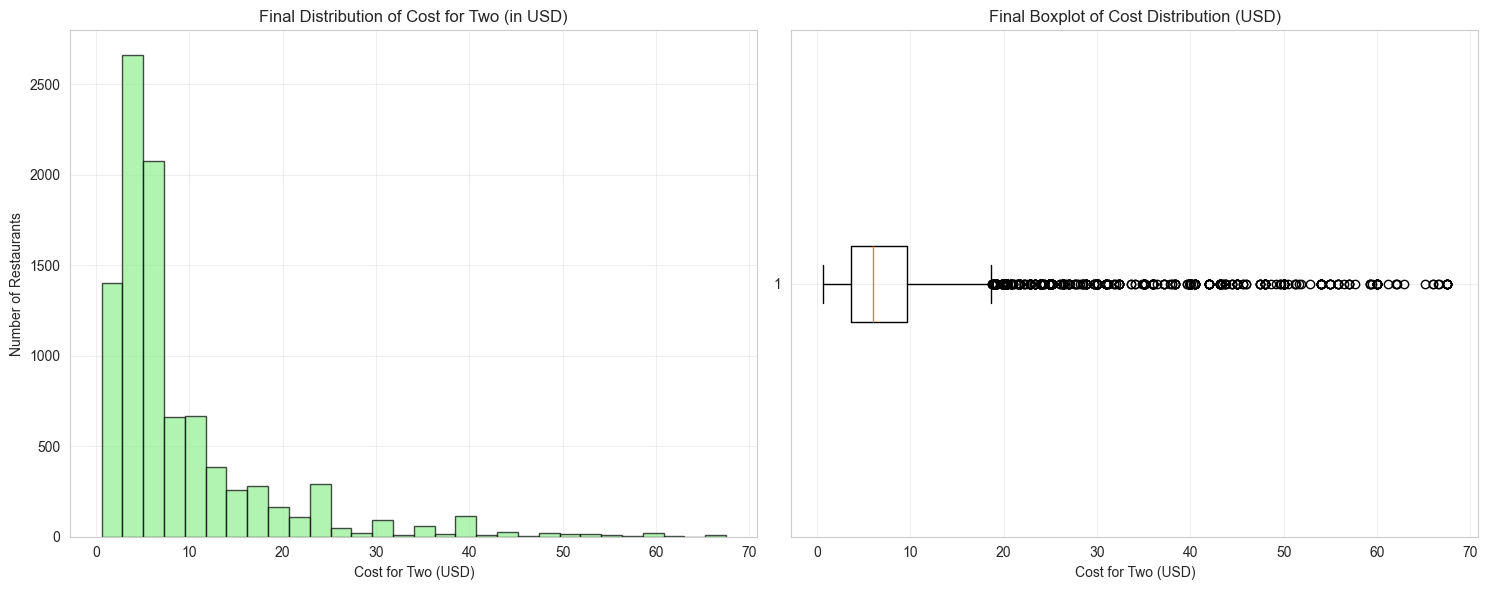


PROCESS COMPLETE! All zero costs have been imputed and converted back to original currencies.


In [93]:
# Create final visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Histogram
axes[0].hist(final_cost_data, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0].set_title('Final Distribution of Cost for Two (in USD)')
axes[0].set_xlabel('Cost for Two (USD)')
axes[0].set_ylabel('Number of Restaurants')
axes[0].grid(True, alpha=0.3)

# Plot 2: Boxplot
axes[1].boxplot(final_cost_data, vert=False)
axes[1].set_title('Final Boxplot of Cost Distribution (USD)')
axes[1].set_xlabel('Cost for Two (USD)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nPROCESS COMPLETE! All zero costs have been imputed and converted back to original currencies.")

COST DISTRIBUTION IN USD:
Count: 9,526
Mean: $10.01
Median: $6.00
Std Dev: $16.39
Min: $0.60
Max: $500.00

PERCENTILE ANALYSIS (USD):
1th percentile: $1.20
5th percentile: $1.80
25th percentile: $3.60
50th percentile: $6.00
75th percentile: $10.00
90th percentile: $21.60
95th percentile: $30.00
99th percentile: $67.50

PRICE SEGMENT DISTRIBUTION (USD):
Budget (≤$15): 8019 restaurants (84.0%)
Moderate ($16-30): 1073 restaurants (11.2%)
Premium ($31-60): 339 restaurants (3.6%)
Expensive ($61-120): 87 restaurants (0.9%)
Luxury (>$120): 23 restaurants (0.2%)


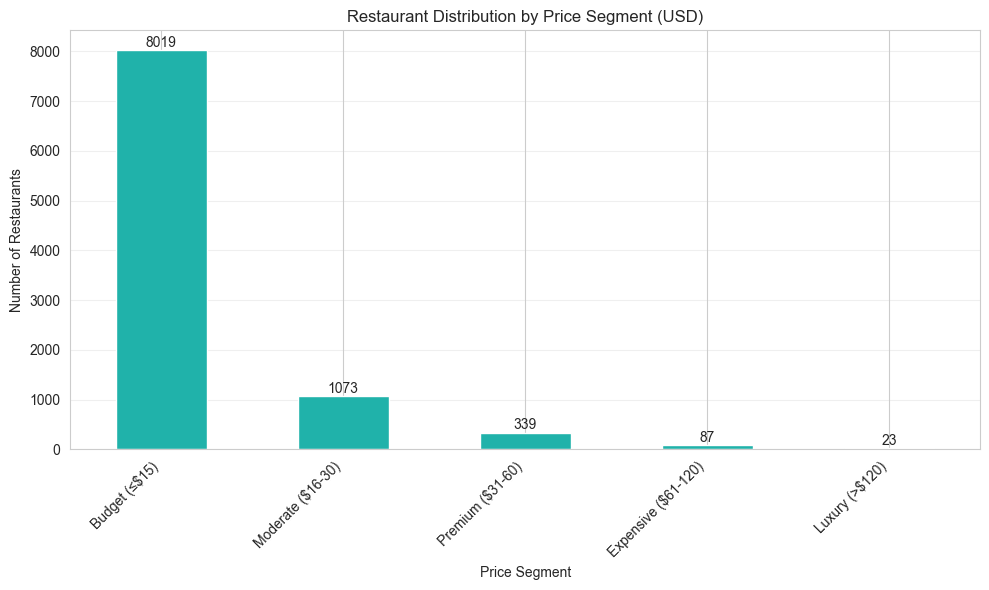

In [94]:
# Statistical summary
print("COST DISTRIBUTION IN USD:")
print("=" * 30)
print(f"Count: {cost_data_usd.count():,}")
print(f"Mean: ${cost_data_usd.mean():.2f}")
print(f"Median: ${cost_data_usd.median():.2f}")
print(f"Std Dev: ${cost_data_usd.std():.2f}")
print(f"Min: ${cost_data_usd.min():.2f}")
print(f"Max: ${cost_data_usd.max():.2f}")

# Percentile analysis
print("\nPERCENTILE ANALYSIS (USD):")
print("=" * 30)
percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]
for p in percentiles:
    value = cost_data_usd.quantile(p)
    print(f"{p*100:.0f}th percentile: ${value:.2f}")

# Price segments in USD
def categorize_cost_usd(cost):
    if cost <= 15:
        return "Budget (≤$15)"
    elif cost <= 30:
        return "Moderate ($16-30)"
    elif cost <= 60:
        return "Premium ($31-60)"
    elif cost <= 120:
        return "Expensive ($61-120)"
    else:
        return "Luxury (>$120)"

data_clean['Price Segment USD'] = data_clean['Cost_in_USD'].apply(categorize_cost_usd)
price_segment_counts = data_clean['Price Segment USD'].value_counts()

print("\nPRICE SEGMENT DISTRIBUTION (USD):")
print("=" * 40)
for segment, count in price_segment_counts.items():
    percentage = (count / len(data_clean)) * 100
    print(f"{segment}: {count} restaurants ({percentage:.1f}%)")

# Visualize price segments
plt.figure(figsize=(10, 6))
price_segment_counts.plot(kind='bar', color='lightseagreen')
plt.title('Restaurant Distribution by Price Segment (USD)')
plt.xlabel('Price Segment')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(price_segment_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### ⭐ Relevance to Star Restaurant Identification  

Understanding the **cost distribution** is essential for defining what makes a restaurant a “star” in the eyes of customers:  

- **Market Positioning:** Since most restaurants are in the **budget–moderate** range, a star restaurant in these categories must differentiate through **quality, service, or unique offerings**, not just price.  
- **Premium & Luxury Segments:** While fewer in number, restaurants in higher cost brackets could stand out as “stars” if they consistently deliver **exceptional ratings, reviews, and experiences** relative to their price point.  
- **Affordability vs. Ratings Trade-off:** Combining cost tiers with ratings, delivery options, and cuisines allows us to identify whether “star” restaurants are **affordable crowd favorites** or **premium niche leaders**.  
- **Customer Segmentation:** Helps tailor recommendations — budget-conscious users might be guided toward high-rated affordable stars, while premium seekers could be shown standout fine-dining options.  

👉 In short: Cost is not the only factor, but it provides **important context**. A restaurant’s **value-for-money positioning** is a key dimension when building a scoring system to flag potential “star” restaurants.  


## Restaurant Rating Distribution & Star Restaurant Identification 

In [95]:
# Rating categories analysis
total_restaurants = len(data_clean)
zero_ratings = len(data_clean[data_clean['Aggregate rating'] == 0])
high_ratings = len(data_clean[data_clean['Aggregate rating'] >= 4.0])
excellent_ratings = len(data_clean[data_clean['Aggregate rating'] >= 4.5])

print(f"\nRATING DISTRIBUTION ANALYSIS:")
print(f"Total restaurants: {total_restaurants}")
print(f"Zero ratings: {zero_ratings} ({zero_ratings/total_restaurants*100:.2f}%)")
print(f"Ratings ≥ 4.0: {high_ratings} ({high_ratings/total_restaurants*100:.2f}%)")
print(f"Ratings ≥ 4.5: {excellent_ratings} ({excellent_ratings/total_restaurants*100:.2f}%)")

# Among rated restaurants only
rated_restaurants = total_restaurants - zero_ratings
print(f"\nAMONG RATED RESTAURANTS ONLY ({rated_restaurants}):")
print(f"Ratings ≥ 4.0: {high_ratings} ({high_ratings/rated_restaurants*100:.2f}%)")
print(f"Ratings ≥ 4.5: {excellent_ratings} ({excellent_ratings/rated_restaurants*100:.2f}%)")


RATING DISTRIBUTION ANALYSIS:
Total restaurants: 9541
Zero ratings: 2148 (22.51%)
Ratings ≥ 4.0: 1377 (14.43%)
Ratings ≥ 4.5: 300 (3.14%)

AMONG RATED RESTAURANTS ONLY (7393):
Ratings ≥ 4.0: 1377 (18.63%)
Ratings ≥ 4.5: 300 (4.06%)


=== RATING DISTRIBUTION VISUALIZATIONS ===


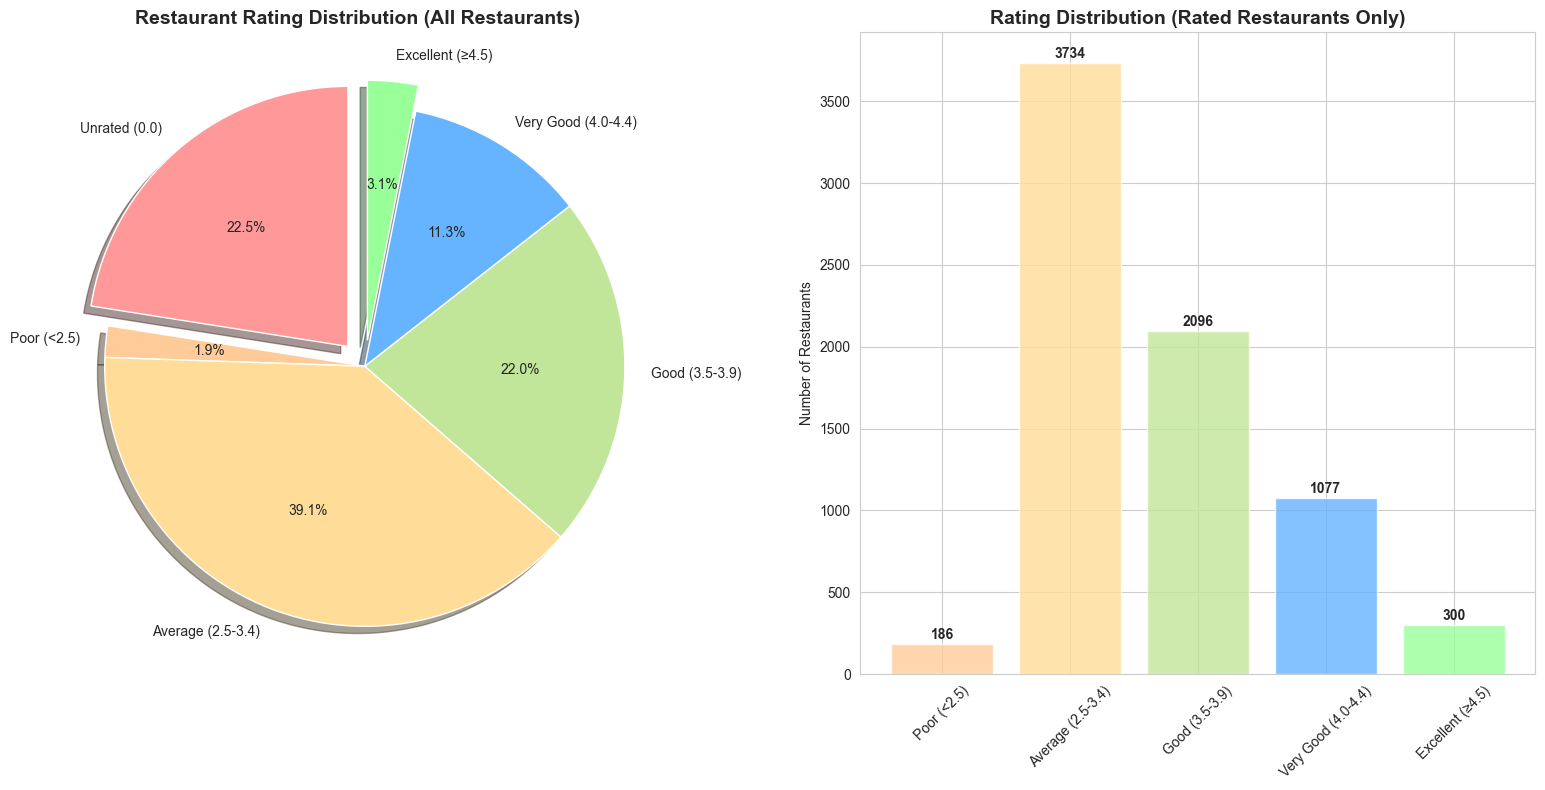

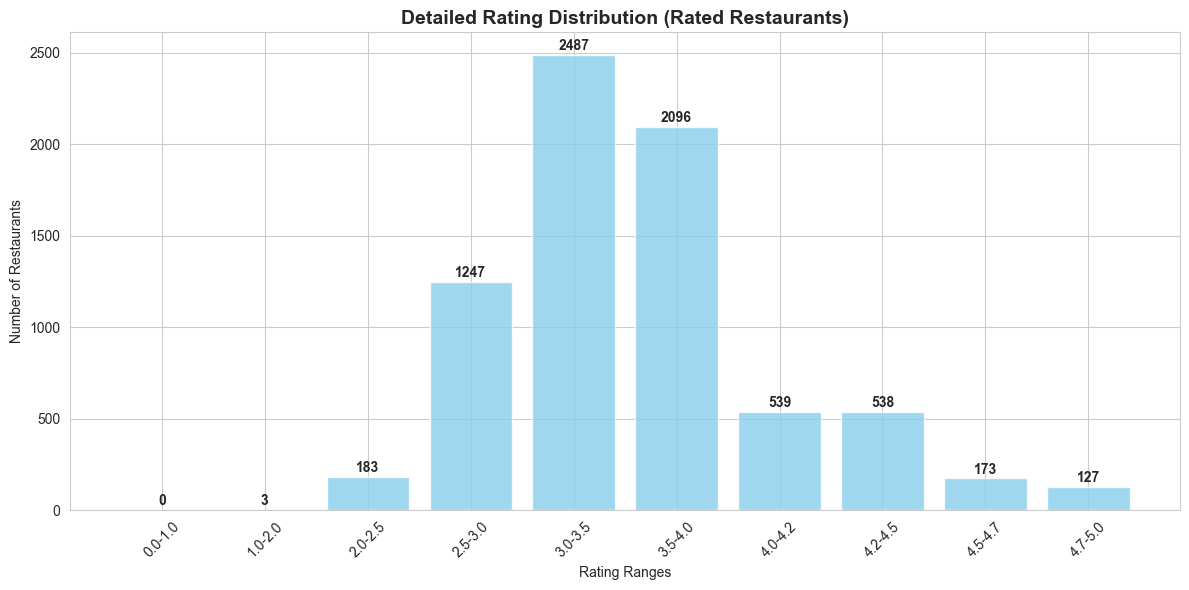


=== RATING THRESHOLD ANALYSIS ===
≥3.5: 3473 restaurants (47.0%)
≥4.0: 1377 restaurants (18.6%)
≥4.2: 838 restaurants (11.3%)
≥4.5: 300 restaurants (4.1%)

⭐ Star Restaurant Candidates (≥4.2): 838
   That's 11.3% of rated restaurants

=== RATING QUALITY BREAKDOWN ===
              Category  Count Percentage
0        Unrated (0.0)   2148      22.5%
1          Poor (<2.5)    186       1.9%
2    Average (2.5-3.4)   3734      39.1%
3       Good (3.5-3.9)   2096      22.0%
4  Very Good (4.0-4.4)   1077      11.3%
5     Excellent (≥4.5)    300       3.1%


In [96]:
# ===== RATING DISTRIBUTION VISUALIZATIONS =====
print("=== RATING DISTRIBUTION VISUALIZATIONS ===")

# Prepare data for visualizations
rating_categories = {
    'Unrated (0.0)': len(data_clean[data_clean['Aggregate rating'] == 0]),
    'Poor (<2.5)': len(data_clean[(data_clean['Aggregate rating'] > 0) & (data_clean['Aggregate rating'] < 2.5)]),
    'Average (2.5-3.4)': len(data_clean[(data_clean['Aggregate rating'] >= 2.5) & (data_clean['Aggregate rating'] < 3.5)]),
    'Good (3.5-3.9)': len(data_clean[(data_clean['Aggregate rating'] >= 3.5) & (data_clean['Aggregate rating'] < 4.0)]),
    'Very Good (4.0-4.4)': len(data_clean[(data_clean['Aggregate rating'] >= 4.0) & (data_clean['Aggregate rating'] < 4.5)]),
    'Excellent (≥4.5)': len(data_clean[data_clean['Aggregate rating'] >= 4.5])
}


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# ===== 1. PIE CHART (All Restaurants) =====
colors = ['#ff9999', '#ffcc99', '#ffdd99', '#c2e699', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0, 0, 0, 0.1)  # explode Unrated and Excellent

axes[0].pie(rating_categories.values(), labels=rating_categories.keys(), autopct='%1.1f%%',
            colors=colors, explode=explode, startangle=90, shadow=True)
axes[0].set_title('Restaurant Rating Distribution (All Restaurants)', fontsize=14, fontweight='bold')
axes[0].axis('equal')

# ===== 2. BAR CHART (Rated Restaurants Only) =====
rated_categories = {k: v for k, v in rating_categories.items() if k != 'Unrated (0.0)'}
colors_rated = ['#ffcc99', '#ffdd99', '#c2e699', '#66b3ff', '#99ff99']

bars = axes[1].bar(rated_categories.keys(), rated_categories.values(), color=colors_rated, alpha=0.8)
axes[1].set_title('Rating Distribution (Rated Restaurants Only)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Restaurants')
axes[1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{height}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ===== 3. DETAILED RATING HISTOGRAM =====
plt.figure(figsize=(12, 6))
rated_data = data_clean[data_clean['Aggregate rating'] > 0]

# Create bins for better visualization
bins = [0, 1, 2, 2.5, 3, 3.5, 4, 4.2, 4.5, 4.7, 5]
hist, bin_edges = np.histogram(rated_data['Aggregate rating'], bins=bins)

plt.bar(range(len(hist)), hist, color='skyblue', alpha=0.8, 
        tick_label=[f'{bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}' for i in range(len(hist))])
plt.title('Detailed Rating Distribution (Rated Restaurants)', fontsize=14, fontweight='bold')
plt.xlabel('Rating Ranges')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(hist):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ===== 4. RATING THRESHOLD ANALYSIS =====
print("\n=== RATING THRESHOLD ANALYSIS ===")
thresholds = [3.5, 4.0, 4.2, 4.5]
for threshold in thresholds:
    count = len(rated_data[rated_data['Aggregate rating'] >= threshold])
    percentage = (count / len(rated_data)) * 100
    print(f"≥{threshold}: {count} restaurants ({percentage:.1f}%)")

# Star restaurant potential
star_candidates = rated_data[rated_data['Aggregate rating'] >= 4.2]
print(f"\n⭐ Star Restaurant Candidates (≥4.2): {len(star_candidates)}")
print(f"   That's {len(star_candidates)/len(rated_data)*100:.1f}% of rated restaurants")

# ===== 5. RATING QUALITY BREAKDOWN TABLE =====
print("\n=== RATING QUALITY BREAKDOWN ===")
breakdown_df = pd.DataFrame({
    'Category': list(rating_categories.keys()),
    'Count': list(rating_categories.values()),
    'Percentage': [f'{(count/total_restaurants)*100:.1f}%' for count in rating_categories.values()]
})
print(breakdown_df)

The charts above provide a breakdown of restaurant ratings across the dataset:  

- **Pie Chart (All Restaurants):** Shows the overall distribution, including **unrated restaurants (≈22.5%)**. A large portion of restaurants fall into the **Average (2.5–3.4)** and **Good (3.5–3.9)** categories, while only a small fraction achieve **Excellent ratings (≥4.5)**.  
- **Bar Chart (Rated Restaurants Only):** Excludes unrated entries and highlights that the majority of rated restaurants still cluster around the **Average** category, with fewer progressing into the **Very Good (4.0–4.4)** and **Excellent (≥4.5)** tiers.  
- **Detailed Histogram:** Offers finer granularity, showing how ratings taper off as they approach the upper bound (close to 5.0).  

### 📊 Why This Matters for Star Restaurants  
- **Identifying Benchmarks:** Restaurants with **ratings ≥4.2** can be considered as strong candidates for “Star” status, since they represent only a **small elite subset** of all rated restaurants.  
- **Market Differentiation:** The rarity of high ratings makes them valuable signals. Restaurants in the **Excellent** category are natural **flagship recommendations** for users.  
- **Data Quality Note:** A significant proportion of restaurants remain **unrated**, which may bias the overall distribution. These should be handled separately to avoid skewing star identification.  

👉 By combining this rating distribution with other factors (votes, cost, delivery, cuisines), we can build a **balanced scoring model** that highlights restaurants which not only score high but also stand out in popularity and accessibility.

## Exploring NOT RATED Restaurants

EXPLORATION OF 'NOT RATED' RESTAURANTS
Total 'Not rated' restaurants: 2,148
Percentage of dataset: 22.51%

1. DESCRIPTIVE STATISTICS
------------------------------------------------------------
       Aggregate rating        Votes  Price range  Cost_in_USD
count            2148.0  2148.000000  2148.000000  2148.000000
mean                0.0     0.870112     1.235102     4.150121
std                 0.0     1.048600     0.493211     2.958114
min                 0.0     0.000000     1.000000     0.600000
25%                 0.0     0.000000     1.000000     2.400000
50%                 0.0     0.000000     1.000000     3.600000
75%                 0.0     2.000000     1.000000     4.800000
max                 0.0     3.000000     4.000000    36.000000

2. PRICE RANGE DISTRIBUTION
------------------------------------------------------------
Price range
1    1700
2     402
3      35
4      11
Name: count, dtype: int64


C:\Users\sushmitha\AppData\Local\Temp\ipykernel_33656\2045739706.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price range', data=not_rated, palette="pastel")


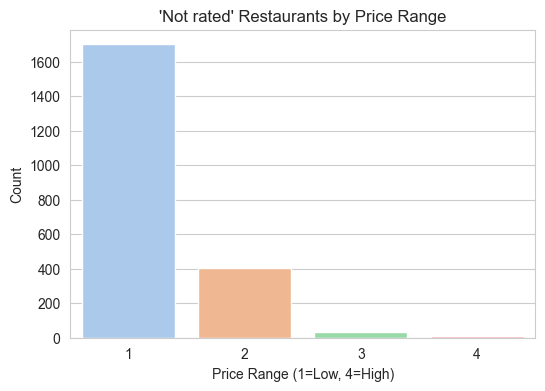


3. VOTES DISTRIBUTION
------------------------------------------------------------


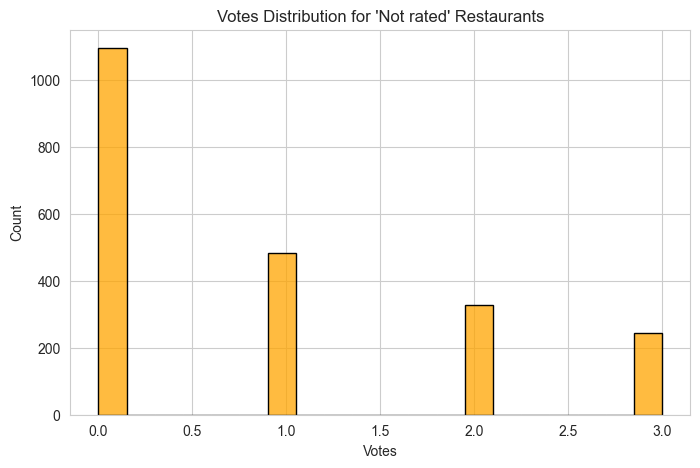

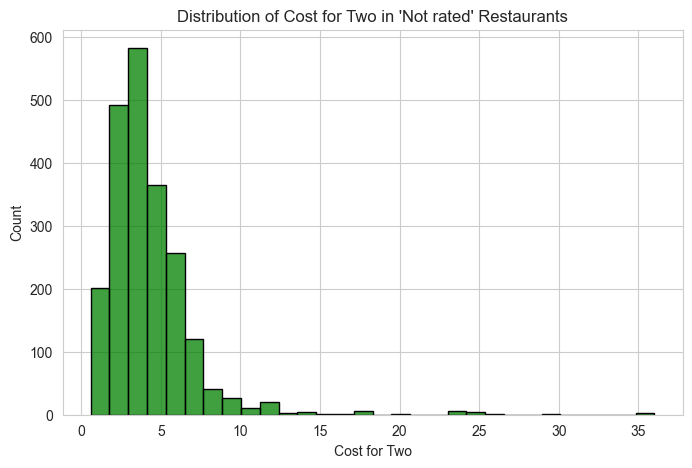


4. TOP CUISINES AMONG 'NOT RATED' RESTAURANTS
------------------------------------------------------------
Cuisines
North Indian             444
Chinese                  130
Fast Food                126
North Indian, Chinese    114
Bakery                    88
Mughlai                   55
Bakery, Desserts          54
Street Food               54
Cafe                      47
Mithai, Street Food       46
Name: count, dtype: int64


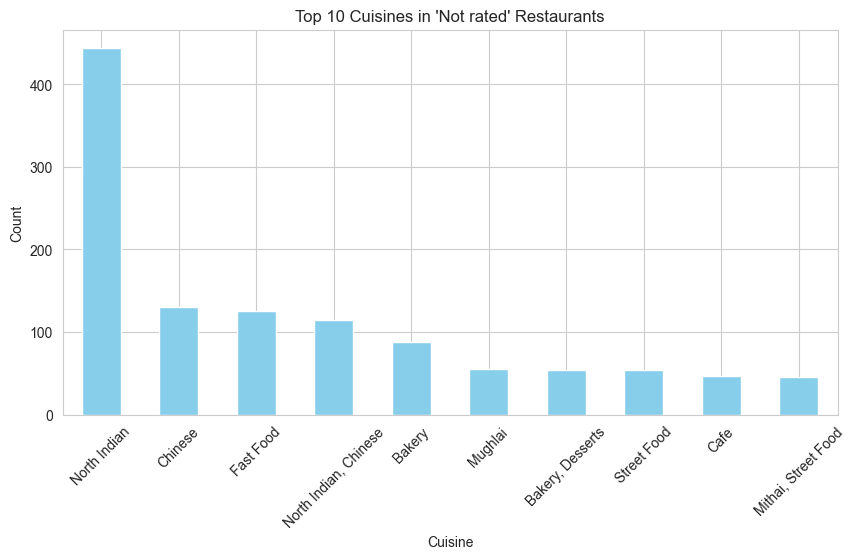


5. CITY DISTRIBUTION
------------------------------------------------------------
City
New Delhi         1425
Noida              384
Gurgaon            228
Faridabad          100
SÌ£o Paulo           3
Ghaziabad            2
Davenport            2
Rio de Janeiro       1
BrasÌ_lia            1
Pocatello            1
Name: count, dtype: int64


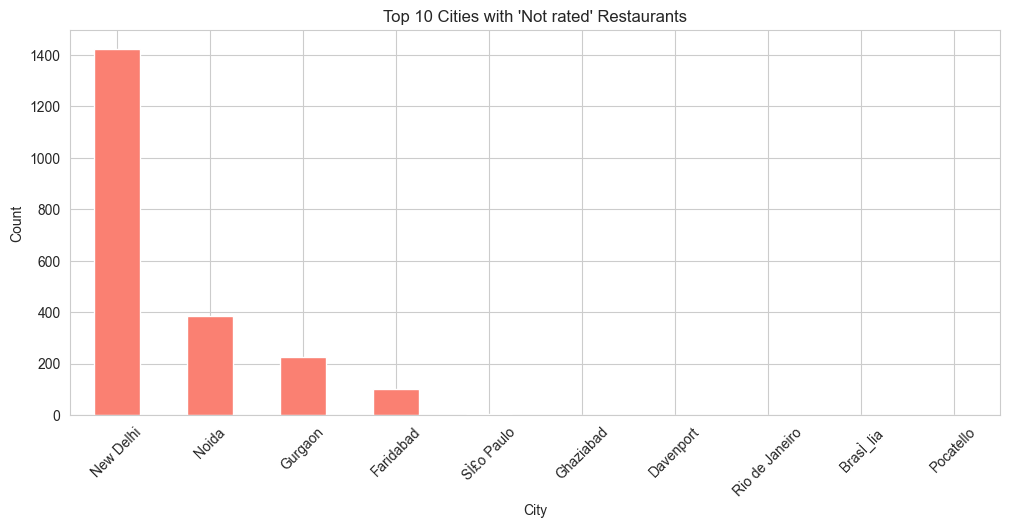

In [159]:
# Filter only Not rated restaurants
not_rated = data_clean[data_clean['Rating text'] == "Not rated"].copy()

print("="*60)
print("EXPLORATION OF 'NOT RATED' RESTAURANTS")
print("="*60)
print(f"Total 'Not rated' restaurants: {len(not_rated):,}")
print(f"Percentage of dataset: {(len(not_rated)/len(data_clean)*100):.2f}%")

# ------------------------------------------
# 1. Basic Descriptive Stats
# ------------------------------------------
print("\n1. DESCRIPTIVE STATISTICS")
print("-"*60)
print(not_rated[['Aggregate rating','Votes','Price range','Cost_in_USD']].describe())

# ------------------------------------------
# 2. Price Range Distribution
# ------------------------------------------
print("\n2. PRICE RANGE DISTRIBUTION")
print("-"*60)
print(not_rated['Price range'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Price range', data=not_rated, palette="pastel")
plt.title("'Not rated' Restaurants by Price Range")
plt.xlabel("Price Range (1=Low, 4=High)")
plt.ylabel("Count")
plt.show()

# ------------------------------------------
# 3. Votes Distribution
# ------------------------------------------
print("\n3. VOTES DISTRIBUTION")
print("-"*60)
plt.figure(figsize=(8,5))
sns.histplot(not_rated['Votes'], bins=20, kde=False, color="orange", edgecolor="black")
plt.title("Votes Distribution for 'Not rated' Restaurants")
plt.xlabel("Votes")
plt.ylabel("Count")
plt.show()

# ------------------------------------------
# 4. Average Cost for Two
# ------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(not_rated['Cost_in_USD'], bins=30, color="green", edgecolor="black")
plt.title("Distribution of Cost for Two in 'Not rated' Restaurants")
plt.xlabel("Cost for Two")
plt.ylabel("Count")
plt.show()

# ------------------------------------------
# 5. Top Cuisines
# ------------------------------------------
print("\n4. TOP CUISINES AMONG 'NOT RATED' RESTAURANTS")
print("-"*60)
top_cuisines = not_rated['Cuisines'].value_counts().head(10)
print(top_cuisines)

plt.figure(figsize=(10,5))
top_cuisines.plot(kind='bar', color="skyblue")
plt.title("Top 10 Cuisines in 'Not rated' Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# ------------------------------------------
# 6. City Distribution
# ------------------------------------------
print("\n5. CITY DISTRIBUTION")
print("-"*60)
top_cities = not_rated['City'].value_counts().head(10)
print(top_cities)

plt.figure(figsize=(12,5))
top_cities.plot(kind='bar', color="salmon")
plt.title("Top 10 Cities with 'Not rated' Restaurants")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Conclusion: Why These Restaurants Are “Not rated”**

- Out of 9,541 restaurants, about 2,148 (22.5%) have an Aggregate rating = 0 and "Rating text = Not rated".

- These restaurants also have extremely low votes (mean ≈ 0.87, max = 3). This indicates insufficient customer feedback rather than poor quality.

- The price range distribution shows that most of these are budget restaurants (≈ 79% in price range 1), with very few in higher price ranges. This suggests they are smaller, local outlets rather than established chains.

- Since their Aggregate rating is always 0.0 with “Not rated”, this is clearly a placeholder value in the dataset rather than a genuine poor performance score.

- Taken together, this pattern strongly indicates that these restaurants are either:

  - Newly opened and haven’t yet received enough reviews, or

  - Recently added to the platform, with little to no customer engagement so far.

## Recommendation

In [ ]:
# =============================================================================
# OPTIMIZED STAR SCORING SYSTEM FOR YOUR DATA (Max Votes: 10,934)
# =============================================================================

print("="*60)
print("BUILDING OPTIMIZED STAR RESTAURANT SYSTEM")
print(f"Maximum votes in dataset: {data_clean['Votes'].max():,}")
print("="*60)

# 1. ENHANCED STAR SCORING FUNCTION (Optimized for your vote range)
# =================================================================

def calculate_star_score_optimized(row):
    """
    Calculate composite star score (0-100) optimized for your data's vote range
    """
    score = 0
    
    # 1. RATING - Most important (40% weight)
    rating_score = (row['Aggregate rating'] / 5) * 40
    score += rating_score
    
    # 2. POPULARITY - Optimized for your max votes of 10,934 (30% weight)
    if row['Votes'] > 0:
        # Use logarithmic scaling to normalize the wide vote range
        # log(10934) ≈ 9.3, so we scale to 0-30 points
        vote_score = (np.log1p(row['Votes']) / np.log1p(10934)) * 30
    else:
        vote_score = 0
    score += vote_score
    
    # 3. PRESTIGE - Price range (20% weight)
    price_score = (row['Price range'] / 4) * 20
    score += price_score
    
    # 4. PREMIUM FEATURES (10% weight)
    feature_score = 0
    if row['Has Table booking'] == 'Yes':
        feature_score += 5
    if row['Has Online delivery'] == 'No':
        feature_score += 5
    score += feature_score
    
    return min(round(score, 2), 100)

# Apply the optimized scoring function
data_clean['Star_Score'] = data_clean.apply(calculate_star_score_optimized, axis=1)



BUILDING OPTIMIZED STAR RESTAURANT SYSTEM
Maximum votes in dataset: 10,934


In [124]:
# 2. DYNAMIC STAR CATEGORIZATION
# ===============================

# Use quantiles for dynamic categorization based on your data distribution
def categorize_star_dynamic(score, data):
    """Dynamically categorize based on score distribution"""
    q85 = data['Star_Score'].quantile(0.85)
    q70 = data['Star_Score'].quantile(0.70)
    q55 = data['Star_Score'].quantile(0.55)
    q40 = data['Star_Score'].quantile(0.40)
    
    if score >= q85:
        return '⭐⭐⭐⭐⭐ Elite Star'
    elif score >= q70:
        return '⭐⭐⭐⭐ Premium'
    elif score >= q55:
        return '⭐⭐⭐ Excellent'
    elif score >= q40:
        return '⭐⭐ Good'
    else:
        return '⭐ Average'

# Calculate quantile thresholds
q85 = data_clean['Star_Score'].quantile(0.85)
q70 = data_clean['Star_Score'].quantile(0.70)
q55 = data_clean['Star_Score'].quantile(0.55)
q40 = data_clean['Star_Score'].quantile(0.40)

data_clean['Star_Category'] = data_clean['Star_Score'].apply(
    lambda x: categorize_star_dynamic(x, data_clean)
)



In [125]:
# 3. ANALYZE THE SCORING RESULTS
# ===============================

print("STAR CATEGORY DISTRIBUTION:")
category_counts = data_clean['Star_Category'].value_counts()
print(category_counts)

print(f"\nSCORING THRESHOLDS:")
print(f"Elite Star (Top 15%): ≥ {q85:.2f} points")
print(f"Premium (Top 30%): ≥ {q70:.2f} points")
print(f"Excellent (Top 45%): ≥ {q55:.2f} points")
print(f"Good (Top 60%): ≥ {q40:.2f} points")



STAR CATEGORY DISTRIBUTION:
Star_Category
⭐ Average           3812
⭐⭐⭐⭐ Premium        1433
⭐⭐⭐⭐⭐ Elite Star    1432
⭐⭐⭐ Excellent       1432
⭐⭐ Good             1432
Name: count, dtype: int64

SCORING THRESHOLDS:
Elite Star (Top 15%): ≥ 67.19 points
Premium (Top 30%): ≥ 57.07 points
Excellent (Top 45%): ≥ 49.92 points
Good (Top 60%): ≥ 44.12 points


In [127]:
data_clean.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country',
       'Coordinates_Imputed', 'Latitude_new', 'Longitude_new',
       'Number_of_Cuisines', 'Cost_in_USD', 'Cost_in_USD_imputed',
       'Average Cost for two_imputed', 'Final_Cost_in_USD',
       'Price Segment USD', 'Star_Score', 'Star_Category'],
      dtype='object')


VOTE DISTRIBUTION ANALYSIS:
Maximum votes: 10,934
Average votes: 157
Median votes: 31
Restaurants with 0 votes: 1094

AVERAGE STAR SCORE BY VOTE RANGE:
Votes
(0, 10]          28.14
(10, 100]        50.35
(100, 500]       63.00
(500, 1000]      71.86
(1000, 5000]     76.95
(5000, 10934]    81.58
Name: Star_Score, dtype: float64

AVERAGE STAR SCORE BY VOTE RANGE:
Votes
(0, 10]          28.14
(10, 100]        50.35
(100, 500]       63.00
(500, 1000]      71.86
(1000, 5000]     76.95
(5000, 10934]    81.58
Name: Star_Score, dtype: float64


C:\Users\sushmitha\AppData\Local\Temp\ipykernel_33656\2548930558.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vote_analysis = data_clean.groupby(vote_groups)['Star_Score'].mean().round(2)


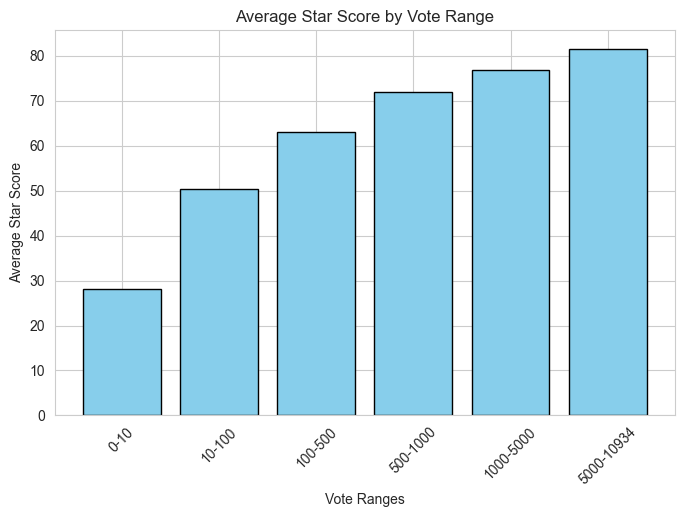

In [131]:

# 4. VOTE ANALYSIS FOR VALIDATION
# ================================

print(f"\nVOTE DISTRIBUTION ANALYSIS:")
print(f"Maximum votes: {data_clean['Votes'].max():,}")
print(f"Average votes: {data_clean['Votes'].mean():.0f}")
print(f"Median votes: {data_clean['Votes'].median():.0f}")
print(f"Restaurants with 0 votes: {(data_clean['Votes'] == 0).sum()}")

# Analyze how votes affect star scores
vote_bins = [0, 10, 100, 500, 1000, 5000, 10934]
vote_groups = pd.cut(data_clean['Votes'], bins=vote_bins)
vote_analysis = data_clean.groupby(vote_groups)['Star_Score'].mean().round(2)

print(f"\nAVERAGE STAR SCORE BY VOTE RANGE:")
print(vote_analysis)


print(f"\nAVERAGE STAR SCORE BY VOTE RANGE:")
print(vote_analysis)

# ✅ Convert IntervalIndex to string labels
labels = [f"{interval.left}-{interval.right}" for interval in vote_analysis.index]

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(labels, vote_analysis.values, color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Vote Ranges")
plt.ylabel("Average Star Score")
plt.title("Average Star Score by Vote Range")
plt.xticks(rotation=45)

plt.show()



In [135]:
# 5. IDENTIFY ELITE STAR RESTAURANTS
# ===================================

elite_restaurants = data_clean[data_clean['Star_Score'] >= q85].copy()
print(f"\nELITE STAR RESTAURANTS (Top 15%): {len(elite_restaurants):,}")
print(f"Percentage of total: {(len(elite_restaurants)/len(data)*100):.1f}%")

# Analyze elite restaurant characteristics
print(f"\nELITE RESTAURANT PROFILE:")
print(f"Average Rating: {elite_restaurants['Aggregate rating'].mean():.2f}/5")
print(f"Average Votes: {elite_restaurants['Votes'].mean():.0f}")
print(f"Average Price Range: {elite_restaurants['Price range'].mean():.1f}/4")
print(f"Table Booking: {(elite_restaurants['Has Table booking'] == 'Yes').mean()*100:.1f}%")
print(f"Online Delivery: {(elite_restaurants['Has Online delivery'] == 'Yes').mean()*100:.1f}%")

# 6. TOP PERFORMING RESTAURANTS
# ==============================

print(f"\nTOP 10 RESTAURANTS BY STAR SCORE:")
top_10 = elite_restaurants.nlargest(10, 'Star_Score')[[
    'Restaurant Name', 'City', 'Cuisines', 
    'Aggregate rating', 'Votes', 'Price range', 'Star_Score'
]]

print(top_10.to_string(index=False))




ELITE STAR RESTAURANTS (Top 15%): 1,432
Percentage of total: 47733.3%

ELITE RESTAURANT PROFILE:
Average Rating: 4.10/5
Average Votes: 675
Average Price Range: 3.2/4
Table Booking: 43.4%
Online Delivery: 17.6%

TOP 10 RESTAURANTS BY STAR SCORE:
                         Restaurant Name        City                                   Cuisines  Aggregate rating  Votes  Price range  Star_Score
                                    Toit   Bangalore                   Italian, American, Pizza               4.8  10934            4       93.40
           Tresind - Nassima Royal Hotel       Dubai                                     Indian               4.9   1352            4       92.46
                                Yauatcha      London                           Chinese, Dim Sum               4.7   1326            4       90.80
                The California Boulevard   New Delhi         American, Asian, European, Seafood               4.6   1691            4       90.78
Spiral - Sofitel Philipp

In [160]:
# 9. SAVE RESULTS FOR DASHBOARD
# ==============================

# Prepare comprehensive dataset
dashboard_data = data_clean[[
    'Restaurant ID', 'Restaurant Name', 'City', 'Country', 
    'Cuisines', 'Longitude', 'Latitude',
    'Average Cost for two', 'Currency','Price range', 'Coordinates_Imputed', 'Latitude_new', 'Longitude_new',
    'Has Table booking', 'Has Online delivery',
    'Aggregate rating', 'Votes', 'Rating text','Cost_in_USD', 'Cost_in_USD_imputed',
       'Average Cost for two_imputed', 'Final_Cost_in_USD',
       'Price Segment USD',
    'Star_Score', 'Star_Category'
]].copy()

# Add additional metrics
dashboard_data['Cuisine_Count'] = dashboard_data['Cuisines'].str.split(', ').str.len()
dashboard_data['Vote_Category'] = pd.cut(dashboard_data['Votes'], 
                                       bins=[-1, 0, 10, 100, 500, 1000, 5000, 10934],
                                       labels=['0', '1-10', '11-100', '101-500', 
                                               '501-1000', '1001-5000', '5000+'])

In [161]:
dashboard_data

,Restaurant ID,Restaurant Name,City,Country,Cuisines,Longitude,Latitude,Average Cost for two,Currency,Price range,...,Rating text,Cost_in_USD,Cost_in_USD_imputed,Average Cost for two_imputed,Final_Cost_in_USD,Price Segment USD,Star_Score,Star_Category,Cuisine_Count,Vote_Category
0,7402935,Skye,Jakarta,Indonesia,"Italian, Continental",106.821999,-6.196778,800000.0,Indonesian Rupiah(IDR),3,...,Very Good,51.2,51.2,800000.0,51.2,Premium ($31-60),76.39,⭐⭐⭐⭐⭐ Elite Star,2,1001-5000
1,7410290,Satoo - Hotel Shangri-La,Jakarta,Indonesia,"Asian, Indonesian, Western",106.818961,-6.203292,800000.0,Indonesian Rupiah(IDR),3,...,Excellent,51.2,51.2,800000.0,51.2,Premium ($31-60),78.65,⭐⭐⭐⭐⭐ Elite Star,3,501-1000
2,7420899,Sushi Masa,Jakarta,Indonesia,"Sushi, Japanese",106.800144,-6.101298,500000.0,Indonesian Rupiah(IDR),3,...,Excellent,32.0,32.0,500000.0,32.0,Premium ($31-60),79.87,⭐⭐⭐⭐⭐ Elite Star,2,501-1000
3,7421967,3 Wise Monkeys,Jakarta,Indonesia,Japanese,106.813400,-6.235241,450000.0,Indonesian Rupiah(IDR),3,...,Very Good,28.8,28.8,450000.0,28.8,Moderate ($16-30),72.90,⭐⭐⭐⭐⭐ Elite Star,1,101-500
4,7422489,Avec Moi Restaurant and Bar,Jakarta,Indonesia,"French, Western",106.821023,-6.196270,350000.0,Indonesian Rupiah(IDR),3,...,Very Good,22.4,22.4,350000.0,22.4,Moderate ($16-30),72.13,⭐⭐⭐⭐⭐ Elite Star,2,101-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9536,18279289,BMG - All Day Dining,Dehradun,India,"Chinese, North Indian, Fast Food",78.068890,30.362686,300.0,Indian Rupees(Rs.),1,...,Very Good,0.0,3.6,300.0,3.6,Budget (≤$15),57.82,⭐⭐⭐⭐ Premium,3,11-100
9537,2300497,Atmosphere Grill Cafe Sheesha,Kanpur,India,"Indian, Chinese, Continental",80.354002,26.472001,300.0,Indian Rupees(Rs.),1,...,Good,0.0,3.6,300.0,3.6,Budget (≤$15),50.27,⭐⭐⭐ Excellent,3,11-100
9538,18312106,UrbanCrave,Kanpur,India,"Cafe, Continental, Desserts, Ice Cream, Italia...",80.342796,26.474986,300.0,Indian Rupees(Rs.),1,...,Good,0.0,3.6,300.0,3.6,Budget (≤$15),56.85,⭐⭐⭐ Excellent,6,101-500
9539,3900245,Deena Chat Bhandar,Varanasi,India,Street Food,0.000000,0.000000,300.0,Indian Rupees(Rs.),1,...,Good,0.0,3.6,300.0,3.6,Budget (≤$15),54.50,⭐⭐⭐ Excellent,1,11-100


In [162]:
dashboard_data.to_csv('optimized_restaurant_dashboard_data.csv', index=False)